## The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2022 Semester 2

## Assignment 2

**Student Name:**    Siu Pui Cheung

**Student ID:**     1230798

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. CNN implementation

In this problem, you will implement a CNN to classify the yoga32 dataset. The following code section will load the dataset from a folder that you specify. You may change the batch sizes and validation percentage if you wish, but otherwise it is recommended that you do not modify this section.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import secrets

data_dir = "./yoga32"
train_batch_size = 32
rand_seed = secrets.randbelow(1_000_000_000) # random seed for train/val split
# note that same seed must be used for both to ensure no overlap in train/val data

# Get training images from 'train' directory
train_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="training",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)


# Get validation images from 'train' directory
val_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/train',
    validation_split=0.2,
    subset="validation",
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=train_batch_size)

# Output list of class names
class_names = train_data.class_names
print(class_names)

# Note: To train a model with the dataset loaded above, pass the train and val
# datasets to the fit() function, like so:
# myCNNmodel.fit(train_data, validation_data=val_data, epochs=number_of_epochs)

Found 520 files belonging to 10 classes.
Using 416 files for training.
Found 520 files belonging to 10 classes.
Using 104 files for validation.
['bridge', 'childs', 'downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']


1.1. Implement the CNN shown in the assignment specification and train it on the provided dataset. Plot the training accuracy and validation accuracy over epochs.

In [2]:
# Create the CNN model
cnn = keras.Sequential(
    [
        layers.Input((32, 32, 3)),
        layers.Conv2D(16, (3, 3), activation='relu', padding='valid'),
        layers.Conv2D(16, (3, 3), activation='relu', padding='valid'),
        layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        layers.Conv2D(24, (3, 3), activation='relu', padding='valid'),
        layers.Conv2D(24, (3, 3), activation='relu', padding='valid'),
        layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ]
)

# Compile and training the model
cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['accuracy'])

# train the model with batch_num
hisotry_cnn = cnn.fit(train_data, epochs=100, batch_size=train_batch_size, validation_data=val_data)

Epoch 1/100
13/13 [==============================] - 3s 89ms/step - loss: 13.3687 - accuracy: 0.1034 - val_loss: 4.6850 - val_accuracy: 0.1058
Epoch 2/100
13/13 [==============================] - 1s 38ms/step - loss: 3.0447 - accuracy: 0.1370 - val_loss: 2.5250 - val_accuracy: 0.1250
Epoch 3/100
13/13 [==============================] - 1s 41ms/step - loss: 2.3403 - accuracy: 0.1683 - val_loss: 2.3213 - val_accuracy: 0.1635
Epoch 4/100
13/13 [==============================] - 1s 39ms/step - loss: 2.1501 - accuracy: 0.2019 - val_loss: 2.2861 - val_accuracy: 0.1923
Epoch 5/100
13/13 [==============================] - 1s 40ms/step - loss: 1.9842 - accuracy: 0.2885 - val_loss: 2.2816 - val_accuracy: 0.2212
Epoch 6/100
13/13 [==============================] - 1s 65ms/step - loss: 1.8114 - accuracy: 0.3510 - val_loss: 2.2870 - val_accuracy: 0.2212
Epoch 7/100
13/13 [==============================] - 1s 43ms/step - loss: 1.6404 - accuracy: 0.4351 - val_loss: 2.2713 - val_accuracy: 0.2692
Epoch

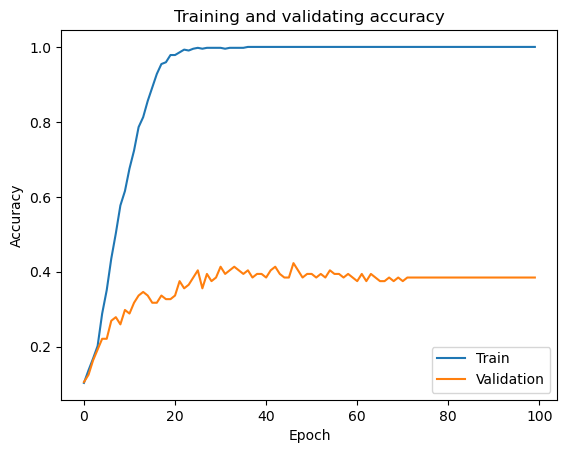

In [3]:
# plot of the accuracy and loss of each epoch
plt.plot(hisotry_cnn.history['accuracy'], label='Train')
plt.plot(hisotry_cnn.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

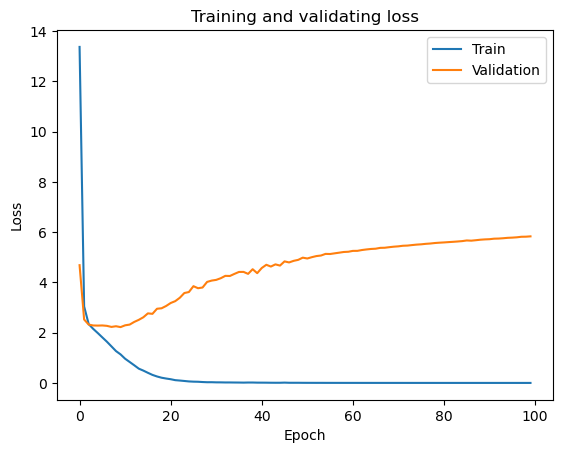

In [4]:
# plot of the accuracy and loss of each epoch
plt.plot(hisotry_cnn.history['loss'], label='Train')
plt.plot(hisotry_cnn.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 24)        3480      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 24)        5208      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 24)         0         
 2D)                                                    

1.2. Modify the CNN (see assignment spec for details) and train it on the provided dataset.  Plot the training accuracy and validation accuracy over epochs.

In [ ]:
# Modify the model with data augmentation and regularization 
cnn_new = keras.Sequential(
            [
                
                layers.Input((32, 32, 3)),
                layers.Rescaling(1./255), # rescale the data
                layers.RandomFlip(mode='horizontal'), #flip the data
                layers.Conv2D(16, (3, 3), activation='relu', padding='valid'),
                layers.Conv2D(16, (3, 3), activation='relu', padding='valid', bias_regularizer=tf.keras.regularizers.L2(0.02)),
                layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
                layers.Conv2D(24, (3, 3), activation='relu', padding='valid'),
                layers.Conv2D(24, (3, 3), activation='relu', padding='valid', kernel_regularizer=tf.keras.regularizers.L2(0.02)),
                layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
                layers.Dropout(0.5, seed=20), # drop out half neuron
                layers.Flatten(),
                layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.L2(0.02)) #use l2 loss function

            ]
        )
cnn_new.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                    metrics=['accuracy'])
        
hisotry_cnn_new = cnn_new.fit(train_data, epochs=10000, batch_size=train_batch_size, validation_data=val_data)

Epoch 1/10000
13/13 [==============================] - 2s 50ms/step - loss: 3.0994 - accuracy: 0.1010 - val_loss: 3.0003 - val_accuracy: 0.1058
Epoch 2/10000
13/13 [==============================] - 0s 22ms/step - loss: 2.9162 - accuracy: 0.1466 - val_loss: 2.8426 - val_accuracy: 0.1058
Epoch 3/10000
13/13 [==============================] - 0s 22ms/step - loss: 2.7710 - accuracy: 0.1587 - val_loss: 2.7162 - val_accuracy: 0.0962
Epoch 4/10000
13/13 [==============================] - 1s 30ms/step - loss: 2.6435 - accuracy: 0.1707 - val_loss: 2.6166 - val_accuracy: 0.1250
Epoch 5/10000
13/13 [==============================] - 0s 23ms/step - loss: 2.5355 - accuracy: 0.1923 - val_loss: 2.5161 - val_accuracy: 0.1827
Epoch 6/10000
13/13 [==============================] - 0s 24ms/step - loss: 2.3875 - accuracy: 0.2332 - val_loss: 2.2929 - val_accuracy: 0.2596
Epoch 7/10000
13/13 [==============================] - 0s 23ms/step - loss: 2.1585 - accuracy: 0.2740 - val_loss: 2.1378 - val_accuracy:

13/13 [==============================] - 0s 25ms/step - loss: 0.8683 - accuracy: 0.7644 - val_loss: 1.7464 - val_accuracy: 0.5962
Epoch 58/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.7790 - accuracy: 0.8269 - val_loss: 1.7565 - val_accuracy: 0.5577
Epoch 59/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.8417 - accuracy: 0.7957 - val_loss: 1.8297 - val_accuracy: 0.5769
Epoch 60/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.8195 - accuracy: 0.8221 - val_loss: 1.7041 - val_accuracy: 0.5673
Epoch 61/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.7798 - accuracy: 0.8149 - val_loss: 1.7788 - val_accuracy: 0.5769
Epoch 62/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.8150 - accuracy: 0.8221 - val_loss: 1.7275 - val_accuracy: 0.5865
Epoch 63/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.8011 - accuracy: 0.8101 - val_loss: 1.7458 - val_accuracy: 0.5865


13/13 [==============================] - 0s 21ms/step - loss: 0.5601 - accuracy: 0.8822 - val_loss: 1.8271 - val_accuracy: 0.6250
Epoch 114/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.5834 - accuracy: 0.8846 - val_loss: 1.9410 - val_accuracy: 0.5385
Epoch 115/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.5423 - accuracy: 0.8822 - val_loss: 1.9210 - val_accuracy: 0.6250
Epoch 116/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.5625 - accuracy: 0.8918 - val_loss: 1.9313 - val_accuracy: 0.5769
Epoch 117/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.5312 - accuracy: 0.9038 - val_loss: 1.9142 - val_accuracy: 0.5962
Epoch 118/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.5537 - accuracy: 0.8630 - val_loss: 1.8605 - val_accuracy: 0.5962
Epoch 119/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.5803 - accuracy: 0.8774 - val_loss: 1.9427 - val_accuracy: 0

13/13 [==============================] - 0s 25ms/step - loss: 0.4472 - accuracy: 0.9111 - val_loss: 1.9147 - val_accuracy: 0.6058
Epoch 170/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.4478 - accuracy: 0.9183 - val_loss: 1.8500 - val_accuracy: 0.5865
Epoch 171/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.4794 - accuracy: 0.9038 - val_loss: 1.9803 - val_accuracy: 0.5577
Epoch 172/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.4984 - accuracy: 0.8990 - val_loss: 1.9961 - val_accuracy: 0.6250
Epoch 173/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.4295 - accuracy: 0.9447 - val_loss: 1.8864 - val_accuracy: 0.5769
Epoch 174/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.4811 - accuracy: 0.9231 - val_loss: 1.9151 - val_accuracy: 0.6154
Epoch 175/10000
13/13 [==============================] - 1s 46ms/step - loss: 0.4756 - accuracy: 0.9231 - val_loss: 1.8935 - val_accuracy: 0

13/13 [==============================] - 0s 22ms/step - loss: 0.4145 - accuracy: 0.9207 - val_loss: 1.9368 - val_accuracy: 0.6058
Epoch 226/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.4789 - accuracy: 0.9038 - val_loss: 1.8849 - val_accuracy: 0.6442
Epoch 227/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.4005 - accuracy: 0.9447 - val_loss: 2.0298 - val_accuracy: 0.6058
Epoch 228/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.4214 - accuracy: 0.9327 - val_loss: 1.9225 - val_accuracy: 0.6154
Epoch 229/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.4207 - accuracy: 0.9255 - val_loss: 1.8945 - val_accuracy: 0.6442
Epoch 230/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.4005 - accuracy: 0.9399 - val_loss: 1.9541 - val_accuracy: 0.5962
Epoch 231/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3633 - accuracy: 0.9447 - val_loss: 1.9420 - val_accuracy: 0

13/13 [==============================] - 0s 22ms/step - loss: 0.4054 - accuracy: 0.9423 - val_loss: 2.0971 - val_accuracy: 0.6058
Epoch 282/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3706 - accuracy: 0.9567 - val_loss: 1.9903 - val_accuracy: 0.6442
Epoch 283/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.3516 - accuracy: 0.9447 - val_loss: 2.0334 - val_accuracy: 0.6346
Epoch 284/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3965 - accuracy: 0.9423 - val_loss: 2.0150 - val_accuracy: 0.6346
Epoch 285/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3666 - accuracy: 0.9399 - val_loss: 1.9607 - val_accuracy: 0.6346
Epoch 286/10000
13/13 [==============================] - 0s 30ms/step - loss: 0.3594 - accuracy: 0.9351 - val_loss: 1.9911 - val_accuracy: 0.6346
Epoch 287/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3836 - accuracy: 0.9423 - val_loss: 1.9649 - val_accuracy: 0

13/13 [==============================] - 0s 22ms/step - loss: 0.3412 - accuracy: 0.9543 - val_loss: 2.1079 - val_accuracy: 0.5962
Epoch 338/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.3672 - accuracy: 0.9183 - val_loss: 1.9922 - val_accuracy: 0.6346
Epoch 339/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3305 - accuracy: 0.9495 - val_loss: 2.0023 - val_accuracy: 0.6058
Epoch 340/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.3063 - accuracy: 0.9663 - val_loss: 2.1592 - val_accuracy: 0.6154
Epoch 341/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.3489 - accuracy: 0.9375 - val_loss: 2.2811 - val_accuracy: 0.6058
Epoch 342/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3376 - accuracy: 0.9495 - val_loss: 2.1406 - val_accuracy: 0.6442
Epoch 343/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3518 - accuracy: 0.9495 - val_loss: 1.9153 - val_accuracy: 0

13/13 [==============================] - 0s 23ms/step - loss: 0.3349 - accuracy: 0.9519 - val_loss: 2.2215 - val_accuracy: 0.6058
Epoch 394/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3372 - accuracy: 0.9447 - val_loss: 2.2643 - val_accuracy: 0.5962
Epoch 395/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3470 - accuracy: 0.9543 - val_loss: 2.0971 - val_accuracy: 0.6250
Epoch 396/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3802 - accuracy: 0.9423 - val_loss: 1.9632 - val_accuracy: 0.5962
Epoch 397/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3073 - accuracy: 0.9567 - val_loss: 1.8869 - val_accuracy: 0.6346
Epoch 398/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3402 - accuracy: 0.9591 - val_loss: 2.0649 - val_accuracy: 0.6250
Epoch 399/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3145 - accuracy: 0.9543 - val_loss: 2.1312 - val_accuracy: 0

13/13 [==============================] - 0s 22ms/step - loss: 0.3360 - accuracy: 0.9423 - val_loss: 2.0213 - val_accuracy: 0.5769
Epoch 450/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2804 - accuracy: 0.9688 - val_loss: 2.0954 - val_accuracy: 0.5769
Epoch 451/10000
13/13 [==============================] - 0s 30ms/step - loss: 0.2956 - accuracy: 0.9712 - val_loss: 2.0817 - val_accuracy: 0.6058
Epoch 452/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3161 - accuracy: 0.9615 - val_loss: 2.1901 - val_accuracy: 0.6058
Epoch 453/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.3317 - accuracy: 0.9447 - val_loss: 2.0504 - val_accuracy: 0.5673
Epoch 454/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3808 - accuracy: 0.9231 - val_loss: 1.9932 - val_accuracy: 0.6058
Epoch 455/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3307 - accuracy: 0.9615 - val_loss: 2.0498 - val_accuracy: 0

13/13 [==============================] - 0s 23ms/step - loss: 0.2978 - accuracy: 0.9543 - val_loss: 1.9794 - val_accuracy: 0.6346
Epoch 506/10000
13/13 [==============================] - 0s 29ms/step - loss: 0.2948 - accuracy: 0.9495 - val_loss: 2.0916 - val_accuracy: 0.6058
Epoch 507/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3388 - accuracy: 0.9375 - val_loss: 2.0167 - val_accuracy: 0.6058
Epoch 508/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2731 - accuracy: 0.9615 - val_loss: 1.9724 - val_accuracy: 0.6250
Epoch 509/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3238 - accuracy: 0.9591 - val_loss: 2.0915 - val_accuracy: 0.6154
Epoch 510/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2812 - accuracy: 0.9639 - val_loss: 2.0359 - val_accuracy: 0.6346
Epoch 511/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3269 - accuracy: 0.9471 - val_loss: 2.1849 - val_accuracy: 0

13/13 [==============================] - 0s 22ms/step - loss: 0.2877 - accuracy: 0.9615 - val_loss: 1.9057 - val_accuracy: 0.6442
Epoch 562/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.3250 - accuracy: 0.9447 - val_loss: 1.9569 - val_accuracy: 0.6250
Epoch 563/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2904 - accuracy: 0.9567 - val_loss: 2.0557 - val_accuracy: 0.6058
Epoch 564/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2867 - accuracy: 0.9519 - val_loss: 2.2963 - val_accuracy: 0.5673
Epoch 565/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2949 - accuracy: 0.9663 - val_loss: 2.0998 - val_accuracy: 0.5962
Epoch 566/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2639 - accuracy: 0.9760 - val_loss: 1.9784 - val_accuracy: 0.6250
Epoch 567/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2494 - accuracy: 0.9688 - val_loss: 2.1011 - val_accuracy: 0

13/13 [==============================] - 0s 22ms/step - loss: 0.2551 - accuracy: 0.9688 - val_loss: 2.2611 - val_accuracy: 0.6250
Epoch 618/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2945 - accuracy: 0.9615 - val_loss: 2.0536 - val_accuracy: 0.6154
Epoch 619/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3020 - accuracy: 0.9447 - val_loss: 2.1748 - val_accuracy: 0.5962
Epoch 620/10000
13/13 [==============================] - 1s 49ms/step - loss: 0.2806 - accuracy: 0.9615 - val_loss: 2.1484 - val_accuracy: 0.6154
Epoch 621/10000
13/13 [==============================] - 1s 55ms/step - loss: 0.2803 - accuracy: 0.9639 - val_loss: 2.0419 - val_accuracy: 0.6346
Epoch 622/10000
13/13 [==============================] - 0s 32ms/step - loss: 0.2911 - accuracy: 0.9567 - val_loss: 2.0846 - val_accuracy: 0.5962
Epoch 623/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.3366 - accuracy: 0.9447 - val_loss: 2.0867 - val_accuracy: 0

13/13 [==============================] - 0s 22ms/step - loss: 0.3181 - accuracy: 0.9471 - val_loss: 2.1546 - val_accuracy: 0.6346
Epoch 674/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2657 - accuracy: 0.9591 - val_loss: 2.1349 - val_accuracy: 0.6250
Epoch 675/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2807 - accuracy: 0.9615 - val_loss: 2.2566 - val_accuracy: 0.6154
Epoch 676/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2498 - accuracy: 0.9712 - val_loss: 2.2315 - val_accuracy: 0.6442
Epoch 677/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2641 - accuracy: 0.9663 - val_loss: 2.1697 - val_accuracy: 0.6538
Epoch 678/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2922 - accuracy: 0.9495 - val_loss: 2.0128 - val_accuracy: 0.6058
Epoch 679/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.3114 - accuracy: 0.9519 - val_loss: 2.2812 - val_accuracy: 0

13/13 [==============================] - 0s 25ms/step - loss: 0.2661 - accuracy: 0.9688 - val_loss: 1.9886 - val_accuracy: 0.6250
Epoch 730/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2444 - accuracy: 0.9736 - val_loss: 2.2743 - val_accuracy: 0.6058
Epoch 731/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2511 - accuracy: 0.9736 - val_loss: 2.2575 - val_accuracy: 0.6346
Epoch 732/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2239 - accuracy: 0.9808 - val_loss: 2.2179 - val_accuracy: 0.6058
Epoch 733/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2383 - accuracy: 0.9832 - val_loss: 2.2835 - val_accuracy: 0.6538
Epoch 734/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.2383 - accuracy: 0.9808 - val_loss: 2.2340 - val_accuracy: 0.6346
Epoch 735/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2538 - accuracy: 0.9639 - val_loss: 2.4046 - val_accuracy: 0

13/13 [==============================] - 0s 23ms/step - loss: 0.2920 - accuracy: 0.9567 - val_loss: 2.1283 - val_accuracy: 0.6442
Epoch 786/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2510 - accuracy: 0.9760 - val_loss: 1.9472 - val_accuracy: 0.6346
Epoch 787/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2874 - accuracy: 0.9615 - val_loss: 2.0402 - val_accuracy: 0.6154
Epoch 788/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2375 - accuracy: 0.9736 - val_loss: 2.3010 - val_accuracy: 0.6635
Epoch 789/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2802 - accuracy: 0.9615 - val_loss: 2.2481 - val_accuracy: 0.6058
Epoch 790/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2243 - accuracy: 0.9784 - val_loss: 2.1988 - val_accuracy: 0.6442
Epoch 791/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2370 - accuracy: 0.9688 - val_loss: 2.1783 - val_accuracy: 0

13/13 [==============================] - 0s 22ms/step - loss: 0.2113 - accuracy: 0.9832 - val_loss: 2.3148 - val_accuracy: 0.6538
Epoch 842/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2664 - accuracy: 0.9663 - val_loss: 2.4623 - val_accuracy: 0.5962
Epoch 843/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2327 - accuracy: 0.9736 - val_loss: 2.4231 - val_accuracy: 0.6250
Epoch 844/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2522 - accuracy: 0.9639 - val_loss: 2.4082 - val_accuracy: 0.6442
Epoch 845/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2420 - accuracy: 0.9784 - val_loss: 2.2659 - val_accuracy: 0.6346
Epoch 846/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2516 - accuracy: 0.9712 - val_loss: 2.2453 - val_accuracy: 0.6442
Epoch 847/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2519 - accuracy: 0.9639 - val_loss: 2.2228 - val_accuracy: 0

13/13 [==============================] - 0s 24ms/step - loss: 0.2210 - accuracy: 0.9760 - val_loss: 2.3484 - val_accuracy: 0.5962
Epoch 898/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2076 - accuracy: 0.9856 - val_loss: 2.3102 - val_accuracy: 0.6154
Epoch 899/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2346 - accuracy: 0.9736 - val_loss: 2.4016 - val_accuracy: 0.5865
Epoch 900/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2092 - accuracy: 0.9880 - val_loss: 2.4198 - val_accuracy: 0.5865
Epoch 901/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2393 - accuracy: 0.9663 - val_loss: 2.4389 - val_accuracy: 0.6058
Epoch 902/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2817 - accuracy: 0.9519 - val_loss: 2.0952 - val_accuracy: 0.6154
Epoch 903/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2482 - accuracy: 0.9663 - val_loss: 2.3334 - val_accuracy: 0

13/13 [==============================] - 0s 23ms/step - loss: 0.2237 - accuracy: 0.9736 - val_loss: 2.3775 - val_accuracy: 0.6250
Epoch 954/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2141 - accuracy: 0.9880 - val_loss: 2.4831 - val_accuracy: 0.5865
Epoch 955/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2347 - accuracy: 0.9712 - val_loss: 2.4939 - val_accuracy: 0.5962
Epoch 956/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2665 - accuracy: 0.9567 - val_loss: 2.5031 - val_accuracy: 0.6250
Epoch 957/10000
13/13 [==============================] - 1s 39ms/step - loss: 0.2450 - accuracy: 0.9712 - val_loss: 2.3907 - val_accuracy: 0.5865
Epoch 958/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2295 - accuracy: 0.9712 - val_loss: 2.4364 - val_accuracy: 0.5865
Epoch 959/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2295 - accuracy: 0.9736 - val_loss: 2.5279 - val_accuracy: 0

13/13 [==============================] - 0s 25ms/step - loss: 0.2310 - accuracy: 0.9808 - val_loss: 2.4857 - val_accuracy: 0.6154
Epoch 1010/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2395 - accuracy: 0.9736 - val_loss: 2.4890 - val_accuracy: 0.6346
Epoch 1011/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2517 - accuracy: 0.9736 - val_loss: 2.4424 - val_accuracy: 0.6538
Epoch 1012/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2308 - accuracy: 0.9712 - val_loss: 2.6119 - val_accuracy: 0.6346
Epoch 1013/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2657 - accuracy: 0.9543 - val_loss: 2.3750 - val_accuracy: 0.6250
Epoch 1014/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2421 - accuracy: 0.9712 - val_loss: 2.5099 - val_accuracy: 0.5962
Epoch 1015/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2214 - accuracy: 0.9760 - val_loss: 2.3078 - val_accur

Epoch 1065/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2112 - accuracy: 0.9784 - val_loss: 2.3260 - val_accuracy: 0.6250
Epoch 1066/10000
13/13 [==============================] - 0s 30ms/step - loss: 0.2222 - accuracy: 0.9712 - val_loss: 2.1936 - val_accuracy: 0.6250
Epoch 1067/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1997 - accuracy: 0.9880 - val_loss: 2.2830 - val_accuracy: 0.6058
Epoch 1068/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2260 - accuracy: 0.9712 - val_loss: 2.3678 - val_accuracy: 0.6058
Epoch 1069/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1937 - accuracy: 0.9856 - val_loss: 2.4588 - val_accuracy: 0.6250
Epoch 1070/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2204 - accuracy: 0.9688 - val_loss: 2.5680 - val_accuracy: 0.6154
Epoch 1071/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2146 - accuracy: 0.9663 - val_loss: 2

Epoch 1121/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2552 - accuracy: 0.9567 - val_loss: 2.6387 - val_accuracy: 0.5385
Epoch 1122/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2769 - accuracy: 0.9663 - val_loss: 2.5541 - val_accuracy: 0.5577
Epoch 1123/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2174 - accuracy: 0.9736 - val_loss: 2.2423 - val_accuracy: 0.6250
Epoch 1124/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2301 - accuracy: 0.9784 - val_loss: 2.4982 - val_accuracy: 0.5962
Epoch 1125/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2191 - accuracy: 0.9808 - val_loss: 2.3756 - val_accuracy: 0.6635
Epoch 1126/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2157 - accuracy: 0.9784 - val_loss: 2.3687 - val_accuracy: 0.5769
Epoch 1127/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2620 - accuracy: 0.9591 - val_loss: 2

Epoch 1177/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2192 - accuracy: 0.9736 - val_loss: 2.5564 - val_accuracy: 0.6442
Epoch 1178/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2380 - accuracy: 0.9688 - val_loss: 2.4949 - val_accuracy: 0.6442
Epoch 1179/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2593 - accuracy: 0.9615 - val_loss: 2.5030 - val_accuracy: 0.6346
Epoch 1180/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2158 - accuracy: 0.9784 - val_loss: 2.2926 - val_accuracy: 0.6538
Epoch 1181/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2242 - accuracy: 0.9712 - val_loss: 2.5276 - val_accuracy: 0.6346
Epoch 1182/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2397 - accuracy: 0.9712 - val_loss: 2.4891 - val_accuracy: 0.6538
Epoch 1183/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2382 - accuracy: 0.9736 - val_loss: 2

Epoch 1233/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2181 - accuracy: 0.9736 - val_loss: 2.3560 - val_accuracy: 0.6250
Epoch 1234/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2252 - accuracy: 0.9736 - val_loss: 2.3012 - val_accuracy: 0.6250
Epoch 1235/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.2350 - accuracy: 0.9712 - val_loss: 2.4742 - val_accuracy: 0.6442
Epoch 1236/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2133 - accuracy: 0.9808 - val_loss: 2.3439 - val_accuracy: 0.6154
Epoch 1237/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2091 - accuracy: 0.9784 - val_loss: 2.2472 - val_accuracy: 0.6442
Epoch 1238/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2083 - accuracy: 0.9832 - val_loss: 2.3059 - val_accuracy: 0.6154
Epoch 1239/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2162 - accuracy: 0.9736 - val_loss: 2

Epoch 1289/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2209 - accuracy: 0.9760 - val_loss: 2.1608 - val_accuracy: 0.6731
Epoch 1290/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1988 - accuracy: 0.9880 - val_loss: 2.2516 - val_accuracy: 0.6538
Epoch 1291/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2107 - accuracy: 0.9639 - val_loss: 2.3335 - val_accuracy: 0.6538
Epoch 1292/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2224 - accuracy: 0.9663 - val_loss: 2.5181 - val_accuracy: 0.6058
Epoch 1293/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2308 - accuracy: 0.9639 - val_loss: 2.4027 - val_accuracy: 0.6154
Epoch 1294/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2027 - accuracy: 0.9832 - val_loss: 2.3634 - val_accuracy: 0.6154
Epoch 1295/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1941 - accuracy: 0.9808 - val_loss: 2

Epoch 1345/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2298 - accuracy: 0.9736 - val_loss: 2.3058 - val_accuracy: 0.6250
Epoch 1346/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2194 - accuracy: 0.9832 - val_loss: 2.5542 - val_accuracy: 0.6058
Epoch 1347/10000
13/13 [==============================] - 0s 29ms/step - loss: 0.2125 - accuracy: 0.9808 - val_loss: 2.2383 - val_accuracy: 0.6442
Epoch 1348/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2272 - accuracy: 0.9808 - val_loss: 2.4604 - val_accuracy: 0.6635
Epoch 1349/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2281 - accuracy: 0.9688 - val_loss: 2.4998 - val_accuracy: 0.6538
Epoch 1350/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2232 - accuracy: 0.9760 - val_loss: 2.5735 - val_accuracy: 0.6250
Epoch 1351/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2065 - accuracy: 0.9736 - val_loss: 2

Epoch 1401/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1876 - accuracy: 0.9904 - val_loss: 2.4533 - val_accuracy: 0.6346
Epoch 1402/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2356 - accuracy: 0.9736 - val_loss: 2.3432 - val_accuracy: 0.6346
Epoch 1403/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2631 - accuracy: 0.9615 - val_loss: 2.1210 - val_accuracy: 0.6250
Epoch 1404/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2139 - accuracy: 0.9808 - val_loss: 2.0742 - val_accuracy: 0.6538
Epoch 1405/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2154 - accuracy: 0.9712 - val_loss: 2.3508 - val_accuracy: 0.6250
Epoch 1406/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1980 - accuracy: 0.9784 - val_loss: 2.3949 - val_accuracy: 0.6635
Epoch 1407/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1904 - accuracy: 0.9856 - val_loss: 2

Epoch 1457/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2023 - accuracy: 0.9784 - val_loss: 2.0771 - val_accuracy: 0.6442
Epoch 1458/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2079 - accuracy: 0.9736 - val_loss: 2.3406 - val_accuracy: 0.6442
Epoch 1459/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2086 - accuracy: 0.9784 - val_loss: 2.6157 - val_accuracy: 0.5962
Epoch 1460/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1873 - accuracy: 0.9856 - val_loss: 2.4985 - val_accuracy: 0.5962
Epoch 1461/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2083 - accuracy: 0.9808 - val_loss: 2.3989 - val_accuracy: 0.5962
Epoch 1462/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1865 - accuracy: 0.9880 - val_loss: 2.3315 - val_accuracy: 0.5962
Epoch 1463/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1724 - accuracy: 0.9904 - val_loss: 2

Epoch 1513/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2187 - accuracy: 0.9808 - val_loss: 2.5805 - val_accuracy: 0.6538
Epoch 1514/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2486 - accuracy: 0.9688 - val_loss: 2.3109 - val_accuracy: 0.6731
Epoch 1515/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2485 - accuracy: 0.9591 - val_loss: 2.2939 - val_accuracy: 0.6346
Epoch 1516/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2221 - accuracy: 0.9760 - val_loss: 2.4141 - val_accuracy: 0.6346
Epoch 1517/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2453 - accuracy: 0.9760 - val_loss: 2.1924 - val_accuracy: 0.6154
Epoch 1518/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2123 - accuracy: 0.9832 - val_loss: 2.4957 - val_accuracy: 0.5865
Epoch 1519/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2147 - accuracy: 0.9856 - val_loss: 2

Epoch 1569/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1765 - accuracy: 0.9832 - val_loss: 2.3063 - val_accuracy: 0.6538
Epoch 1570/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.1657 - accuracy: 0.9856 - val_loss: 2.4132 - val_accuracy: 0.6635
Epoch 1571/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1842 - accuracy: 0.9808 - val_loss: 2.3288 - val_accuracy: 0.6635
Epoch 1572/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1713 - accuracy: 0.9904 - val_loss: 2.2296 - val_accuracy: 0.6346
Epoch 1573/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1908 - accuracy: 0.9808 - val_loss: 2.3001 - val_accuracy: 0.6442
Epoch 1574/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2193 - accuracy: 0.9736 - val_loss: 2.5735 - val_accuracy: 0.6154
Epoch 1575/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2192 - accuracy: 0.9712 - val_loss: 2

Epoch 1625/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.1794 - accuracy: 0.9904 - val_loss: 2.4233 - val_accuracy: 0.6346
Epoch 1626/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.2068 - accuracy: 0.9856 - val_loss: 2.3559 - val_accuracy: 0.6346
Epoch 1627/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2242 - accuracy: 0.9760 - val_loss: 2.2212 - val_accuracy: 0.6346
Epoch 1628/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2051 - accuracy: 0.9784 - val_loss: 2.2328 - val_accuracy: 0.6635
Epoch 1629/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2100 - accuracy: 0.9784 - val_loss: 2.1253 - val_accuracy: 0.6731
Epoch 1630/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1991 - accuracy: 0.9856 - val_loss: 2.1459 - val_accuracy: 0.6923
Epoch 1631/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1796 - accuracy: 0.9880 - val_loss: 2

Epoch 1681/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1954 - accuracy: 0.9832 - val_loss: 2.2211 - val_accuracy: 0.6058
Epoch 1682/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2207 - accuracy: 0.9856 - val_loss: 2.3308 - val_accuracy: 0.6154
Epoch 1683/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1892 - accuracy: 0.9832 - val_loss: 2.2227 - val_accuracy: 0.6346
Epoch 1684/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1969 - accuracy: 0.9784 - val_loss: 2.1967 - val_accuracy: 0.6442
Epoch 1685/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2331 - accuracy: 0.9663 - val_loss: 2.2774 - val_accuracy: 0.6346
Epoch 1686/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2040 - accuracy: 0.9736 - val_loss: 2.3039 - val_accuracy: 0.6154
Epoch 1687/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.2137 - accuracy: 0.9712 - val_loss: 2

Epoch 1737/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2277 - accuracy: 0.9688 - val_loss: 2.5769 - val_accuracy: 0.6058
Epoch 1738/10000
13/13 [==============================] - 0s 30ms/step - loss: 0.2259 - accuracy: 0.9615 - val_loss: 2.2671 - val_accuracy: 0.6442
Epoch 1739/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2258 - accuracy: 0.9760 - val_loss: 2.4422 - val_accuracy: 0.6346
Epoch 1740/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2154 - accuracy: 0.9712 - val_loss: 2.1308 - val_accuracy: 0.6923
Epoch 1741/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2197 - accuracy: 0.9736 - val_loss: 2.3418 - val_accuracy: 0.6442
Epoch 1742/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2136 - accuracy: 0.9760 - val_loss: 2.3796 - val_accuracy: 0.6635
Epoch 1743/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2388 - accuracy: 0.9688 - val_loss: 2

Epoch 1793/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2200 - accuracy: 0.9784 - val_loss: 2.5164 - val_accuracy: 0.6538
Epoch 1794/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2006 - accuracy: 0.9688 - val_loss: 2.4127 - val_accuracy: 0.6538
Epoch 1795/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1962 - accuracy: 0.9808 - val_loss: 2.4231 - val_accuracy: 0.6250
Epoch 1796/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1961 - accuracy: 0.9808 - val_loss: 2.1641 - val_accuracy: 0.6346
Epoch 1797/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1954 - accuracy: 0.9784 - val_loss: 2.5448 - val_accuracy: 0.5962
Epoch 1798/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2266 - accuracy: 0.9760 - val_loss: 2.0566 - val_accuracy: 0.7019
Epoch 1799/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2352 - accuracy: 0.9760 - val_loss: 2

Epoch 1849/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1794 - accuracy: 0.9928 - val_loss: 2.3862 - val_accuracy: 0.6058
Epoch 1850/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1819 - accuracy: 0.9856 - val_loss: 2.4034 - val_accuracy: 0.6250
Epoch 1851/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1817 - accuracy: 0.9904 - val_loss: 2.4643 - val_accuracy: 0.6250
Epoch 1852/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1922 - accuracy: 0.9760 - val_loss: 2.6196 - val_accuracy: 0.6346
Epoch 1853/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2271 - accuracy: 0.9736 - val_loss: 2.0692 - val_accuracy: 0.6923
Epoch 1854/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1986 - accuracy: 0.9784 - val_loss: 2.0311 - val_accuracy: 0.7019
Epoch 1855/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2009 - accuracy: 0.9808 - val_loss: 2

Epoch 1905/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2097 - accuracy: 0.9663 - val_loss: 2.4878 - val_accuracy: 0.6346
Epoch 1906/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1827 - accuracy: 0.9832 - val_loss: 2.2558 - val_accuracy: 0.6154
Epoch 1907/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1839 - accuracy: 0.9832 - val_loss: 2.3477 - val_accuracy: 0.6827
Epoch 1908/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1894 - accuracy: 0.9832 - val_loss: 2.4548 - val_accuracy: 0.6635
Epoch 1909/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2244 - accuracy: 0.9712 - val_loss: 2.3756 - val_accuracy: 0.6442
Epoch 1910/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1831 - accuracy: 0.9904 - val_loss: 2.2859 - val_accuracy: 0.6635
Epoch 1911/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2065 - accuracy: 0.9688 - val_loss: 2

Epoch 1961/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.2067 - accuracy: 0.9784 - val_loss: 2.3704 - val_accuracy: 0.6538
Epoch 1962/10000
13/13 [==============================] - 0s 30ms/step - loss: 0.1855 - accuracy: 0.9808 - val_loss: 2.5590 - val_accuracy: 0.6346
Epoch 1963/10000
13/13 [==============================] - 0s 31ms/step - loss: 0.2231 - accuracy: 0.9639 - val_loss: 2.4136 - val_accuracy: 0.6442
Epoch 1964/10000
13/13 [==============================] - 0s 30ms/step - loss: 0.2032 - accuracy: 0.9736 - val_loss: 2.1498 - val_accuracy: 0.6731
Epoch 1965/10000
13/13 [==============================] - 0s 28ms/step - loss: 0.2085 - accuracy: 0.9663 - val_loss: 2.1736 - val_accuracy: 0.6731
Epoch 1966/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2198 - accuracy: 0.9736 - val_loss: 2.2857 - val_accuracy: 0.6442
Epoch 1967/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1800 - accuracy: 0.9904 - val_loss: 2

Epoch 2017/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2230 - accuracy: 0.9712 - val_loss: 2.8278 - val_accuracy: 0.5769
Epoch 2018/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2116 - accuracy: 0.9688 - val_loss: 2.6032 - val_accuracy: 0.7019
Epoch 2019/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2107 - accuracy: 0.9808 - val_loss: 2.6523 - val_accuracy: 0.6442
Epoch 2020/10000
13/13 [==============================] - 0s 28ms/step - loss: 0.2675 - accuracy: 0.9639 - val_loss: 2.6184 - val_accuracy: 0.6731
Epoch 2021/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.2289 - accuracy: 0.9663 - val_loss: 2.1782 - val_accuracy: 0.6923
Epoch 2022/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2165 - accuracy: 0.9856 - val_loss: 2.2133 - val_accuracy: 0.7019
Epoch 2023/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.2572 - accuracy: 0.9615 - val_loss: 2

Epoch 2073/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2310 - accuracy: 0.9760 - val_loss: 2.0894 - val_accuracy: 0.6635
Epoch 2074/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1833 - accuracy: 0.9880 - val_loss: 2.1038 - val_accuracy: 0.6731
Epoch 2075/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2023 - accuracy: 0.9808 - val_loss: 2.1805 - val_accuracy: 0.6538
Epoch 2076/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1916 - accuracy: 0.9856 - val_loss: 2.2830 - val_accuracy: 0.6635
Epoch 2077/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1867 - accuracy: 0.9856 - val_loss: 2.3842 - val_accuracy: 0.6538
Epoch 2078/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2045 - accuracy: 0.9736 - val_loss: 2.2850 - val_accuracy: 0.6731
Epoch 2079/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1773 - accuracy: 0.9880 - val_loss: 2

Epoch 2129/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1940 - accuracy: 0.9808 - val_loss: 2.7467 - val_accuracy: 0.6154
Epoch 2130/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2420 - accuracy: 0.9615 - val_loss: 2.5475 - val_accuracy: 0.6442
Epoch 2131/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.2301 - accuracy: 0.9712 - val_loss: 2.6339 - val_accuracy: 0.6154
Epoch 2132/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2277 - accuracy: 0.9784 - val_loss: 2.4438 - val_accuracy: 0.6538
Epoch 2133/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2103 - accuracy: 0.9880 - val_loss: 2.3896 - val_accuracy: 0.6923
Epoch 2134/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1977 - accuracy: 0.9904 - val_loss: 2.3785 - val_accuracy: 0.7115
Epoch 2135/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1986 - accuracy: 0.9784 - val_loss: 2

Epoch 2185/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1947 - accuracy: 0.9784 - val_loss: 2.4767 - val_accuracy: 0.6538
Epoch 2186/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.1828 - accuracy: 0.9928 - val_loss: 2.6902 - val_accuracy: 0.6154
Epoch 2187/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.1953 - accuracy: 0.9880 - val_loss: 2.7349 - val_accuracy: 0.6346
Epoch 2188/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.2151 - accuracy: 0.9808 - val_loss: 2.4878 - val_accuracy: 0.6538
Epoch 2189/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.1976 - accuracy: 0.9856 - val_loss: 2.6159 - val_accuracy: 0.6442
Epoch 2190/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1859 - accuracy: 0.9832 - val_loss: 2.5325 - val_accuracy: 0.6346
Epoch 2191/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1874 - accuracy: 0.9856 - val_loss: 2

Epoch 2241/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1934 - accuracy: 0.9808 - val_loss: 3.0253 - val_accuracy: 0.6346
Epoch 2242/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1848 - accuracy: 0.9784 - val_loss: 2.8497 - val_accuracy: 0.6250
Epoch 2243/10000
13/13 [==============================] - 0s 32ms/step - loss: 0.2133 - accuracy: 0.9808 - val_loss: 2.7888 - val_accuracy: 0.6635
Epoch 2244/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2074 - accuracy: 0.9784 - val_loss: 2.7678 - val_accuracy: 0.6058
Epoch 2245/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.1803 - accuracy: 0.9832 - val_loss: 2.8834 - val_accuracy: 0.6058
Epoch 2246/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2080 - accuracy: 0.9736 - val_loss: 2.7360 - val_accuracy: 0.6154
Epoch 2247/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.1916 - accuracy: 0.9880 - val_loss: 2

Epoch 2297/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1861 - accuracy: 0.9832 - val_loss: 2.6513 - val_accuracy: 0.6250
Epoch 2298/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.2251 - accuracy: 0.9663 - val_loss: 2.3609 - val_accuracy: 0.6346
Epoch 2299/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2056 - accuracy: 0.9688 - val_loss: 2.6599 - val_accuracy: 0.6442
Epoch 2300/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.2014 - accuracy: 0.9760 - val_loss: 2.6110 - val_accuracy: 0.6635
Epoch 2301/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1930 - accuracy: 0.9808 - val_loss: 2.5699 - val_accuracy: 0.6250
Epoch 2302/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2085 - accuracy: 0.9736 - val_loss: 2.4729 - val_accuracy: 0.6635
Epoch 2303/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.1834 - accuracy: 0.9808 - val_loss: 2

Epoch 2353/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1979 - accuracy: 0.9832 - val_loss: 2.2972 - val_accuracy: 0.6346
Epoch 2354/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1927 - accuracy: 0.9784 - val_loss: 2.4173 - val_accuracy: 0.6346
Epoch 2355/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.2255 - accuracy: 0.9808 - val_loss: 2.2818 - val_accuracy: 0.6442
Epoch 2356/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1902 - accuracy: 0.9808 - val_loss: 2.3987 - val_accuracy: 0.6346
Epoch 2357/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1935 - accuracy: 0.9856 - val_loss: 2.3863 - val_accuracy: 0.7019
Epoch 2358/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1968 - accuracy: 0.9832 - val_loss: 2.3410 - val_accuracy: 0.6538
Epoch 2359/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1974 - accuracy: 0.9808 - val_loss: 2

Epoch 2409/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1630 - accuracy: 0.9904 - val_loss: 2.3819 - val_accuracy: 0.6442
Epoch 2410/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1932 - accuracy: 0.9832 - val_loss: 2.5017 - val_accuracy: 0.6058
Epoch 2411/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1908 - accuracy: 0.9856 - val_loss: 2.4329 - val_accuracy: 0.6635
Epoch 2412/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.1813 - accuracy: 0.9856 - val_loss: 2.6593 - val_accuracy: 0.5962
Epoch 2413/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1869 - accuracy: 0.9904 - val_loss: 2.6721 - val_accuracy: 0.6346
Epoch 2414/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.1827 - accuracy: 0.9808 - val_loss: 2.5673 - val_accuracy: 0.6538
Epoch 2415/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1718 - accuracy: 0.9832 - val_loss: 2

Epoch 2465/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1888 - accuracy: 0.9832 - val_loss: 2.6748 - val_accuracy: 0.6250
Epoch 2466/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2429 - accuracy: 0.9591 - val_loss: 2.6726 - val_accuracy: 0.6154
Epoch 2467/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2139 - accuracy: 0.9688 - val_loss: 2.9716 - val_accuracy: 0.6250
Epoch 2468/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1961 - accuracy: 0.9880 - val_loss: 3.0675 - val_accuracy: 0.6154
Epoch 2469/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2264 - accuracy: 0.9808 - val_loss: 2.6859 - val_accuracy: 0.6346
Epoch 2470/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2058 - accuracy: 0.9784 - val_loss: 2.4780 - val_accuracy: 0.6346
Epoch 2471/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2141 - accuracy: 0.9712 - val_loss: 2

Epoch 2521/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1684 - accuracy: 0.9904 - val_loss: 2.2773 - val_accuracy: 0.6346
Epoch 2522/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.1911 - accuracy: 0.9832 - val_loss: 2.2011 - val_accuracy: 0.6442
Epoch 2523/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1801 - accuracy: 0.9808 - val_loss: 2.4158 - val_accuracy: 0.6250
Epoch 2524/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1781 - accuracy: 0.9736 - val_loss: 2.4507 - val_accuracy: 0.6442
Epoch 2525/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1790 - accuracy: 0.9832 - val_loss: 2.6119 - val_accuracy: 0.6058
Epoch 2526/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1958 - accuracy: 0.9808 - val_loss: 2.5100 - val_accuracy: 0.6058
Epoch 2527/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1846 - accuracy: 0.9880 - val_loss: 2

Epoch 2577/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1681 - accuracy: 0.9904 - val_loss: 2.5722 - val_accuracy: 0.6154
Epoch 2578/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1683 - accuracy: 0.9904 - val_loss: 2.7535 - val_accuracy: 0.5769
Epoch 2579/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1851 - accuracy: 0.9808 - val_loss: 3.0392 - val_accuracy: 0.5673
Epoch 2580/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1834 - accuracy: 0.9808 - val_loss: 2.7282 - val_accuracy: 0.5865
Epoch 2581/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1905 - accuracy: 0.9808 - val_loss: 2.5807 - val_accuracy: 0.6250
Epoch 2582/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1916 - accuracy: 0.9832 - val_loss: 2.4376 - val_accuracy: 0.6442
Epoch 2583/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1940 - accuracy: 0.9832 - val_loss: 2

Epoch 2633/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1951 - accuracy: 0.9712 - val_loss: 2.3460 - val_accuracy: 0.6250
Epoch 2634/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1858 - accuracy: 0.9784 - val_loss: 2.4512 - val_accuracy: 0.6442
Epoch 2635/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2160 - accuracy: 0.9712 - val_loss: 2.4067 - val_accuracy: 0.6538
Epoch 2636/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1929 - accuracy: 0.9712 - val_loss: 2.3695 - val_accuracy: 0.6442
Epoch 2637/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2011 - accuracy: 0.9712 - val_loss: 2.4493 - val_accuracy: 0.5962
Epoch 2638/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1743 - accuracy: 0.9880 - val_loss: 2.5072 - val_accuracy: 0.6154
Epoch 2639/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1824 - accuracy: 0.9808 - val_loss: 2

Epoch 2689/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1875 - accuracy: 0.9736 - val_loss: 2.3823 - val_accuracy: 0.6442
Epoch 2690/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1818 - accuracy: 0.9856 - val_loss: 2.3719 - val_accuracy: 0.6346
Epoch 2691/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.2086 - accuracy: 0.9808 - val_loss: 2.5134 - val_accuracy: 0.6346
Epoch 2692/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1769 - accuracy: 0.9832 - val_loss: 2.2214 - val_accuracy: 0.6635
Epoch 2693/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1676 - accuracy: 0.9904 - val_loss: 2.2854 - val_accuracy: 0.6731
Epoch 2694/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1646 - accuracy: 0.9880 - val_loss: 2.4630 - val_accuracy: 0.6250
Epoch 2695/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1793 - accuracy: 0.9880 - val_loss: 2

Epoch 2745/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1825 - accuracy: 0.9784 - val_loss: 2.0840 - val_accuracy: 0.6154
Epoch 2746/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1689 - accuracy: 0.9904 - val_loss: 2.1771 - val_accuracy: 0.6250
Epoch 2747/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.1932 - accuracy: 0.9760 - val_loss: 2.1205 - val_accuracy: 0.6346
Epoch 2748/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1895 - accuracy: 0.9784 - val_loss: 2.1690 - val_accuracy: 0.6250
Epoch 2749/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1609 - accuracy: 0.9832 - val_loss: 2.2037 - val_accuracy: 0.6154
Epoch 2750/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1732 - accuracy: 0.9808 - val_loss: 2.4018 - val_accuracy: 0.6731
Epoch 2751/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1719 - accuracy: 0.9856 - val_loss: 2

Epoch 2801/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1941 - accuracy: 0.9832 - val_loss: 1.9933 - val_accuracy: 0.6635
Epoch 2802/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1866 - accuracy: 0.9808 - val_loss: 2.0834 - val_accuracy: 0.6538
Epoch 2803/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2295 - accuracy: 0.9591 - val_loss: 2.1112 - val_accuracy: 0.6442
Epoch 2804/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1958 - accuracy: 0.9808 - val_loss: 2.1653 - val_accuracy: 0.6250
Epoch 2805/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1688 - accuracy: 0.9952 - val_loss: 2.2732 - val_accuracy: 0.6250
Epoch 2806/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1900 - accuracy: 0.9832 - val_loss: 2.2650 - val_accuracy: 0.6154
Epoch 2807/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.1897 - accuracy: 0.9880 - val_loss: 2

Epoch 2857/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1898 - accuracy: 0.9760 - val_loss: 2.2000 - val_accuracy: 0.6058
Epoch 2858/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1841 - accuracy: 0.9904 - val_loss: 2.3367 - val_accuracy: 0.6635
Epoch 2859/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2018 - accuracy: 0.9808 - val_loss: 2.0690 - val_accuracy: 0.6538
Epoch 2860/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1763 - accuracy: 0.9856 - val_loss: 2.1427 - val_accuracy: 0.6538
Epoch 2861/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1792 - accuracy: 0.9856 - val_loss: 2.1625 - val_accuracy: 0.6731
Epoch 2862/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1764 - accuracy: 0.9856 - val_loss: 2.2847 - val_accuracy: 0.6250
Epoch 2863/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1718 - accuracy: 0.9856 - val_loss: 2

Epoch 2913/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1554 - accuracy: 0.9904 - val_loss: 2.3694 - val_accuracy: 0.6538
Epoch 2914/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.1508 - accuracy: 0.9928 - val_loss: 2.4490 - val_accuracy: 0.5865
Epoch 2915/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1680 - accuracy: 0.9904 - val_loss: 2.1570 - val_accuracy: 0.6250
Epoch 2916/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1736 - accuracy: 0.9832 - val_loss: 2.0719 - val_accuracy: 0.6538
Epoch 2917/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1955 - accuracy: 0.9736 - val_loss: 2.0213 - val_accuracy: 0.6442
Epoch 2918/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1647 - accuracy: 0.9880 - val_loss: 2.1493 - val_accuracy: 0.6731
Epoch 2919/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1765 - accuracy: 0.9856 - val_loss: 2

Epoch 2969/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.1851 - accuracy: 0.9736 - val_loss: 2.2346 - val_accuracy: 0.6442
Epoch 2970/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1998 - accuracy: 0.9784 - val_loss: 2.3251 - val_accuracy: 0.6250
Epoch 2971/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1956 - accuracy: 0.9688 - val_loss: 2.4784 - val_accuracy: 0.6250
Epoch 2972/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2125 - accuracy: 0.9784 - val_loss: 2.2779 - val_accuracy: 0.6442
Epoch 2973/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1764 - accuracy: 0.9880 - val_loss: 2.3636 - val_accuracy: 0.6442
Epoch 2974/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1742 - accuracy: 0.9856 - val_loss: 2.1996 - val_accuracy: 0.6635
Epoch 2975/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1769 - accuracy: 0.9880 - val_loss: 2

Epoch 3025/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1786 - accuracy: 0.9928 - val_loss: 2.3854 - val_accuracy: 0.6250
Epoch 3026/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2019 - accuracy: 0.9760 - val_loss: 2.3835 - val_accuracy: 0.6250
Epoch 3027/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1693 - accuracy: 0.9880 - val_loss: 2.4163 - val_accuracy: 0.6442
Epoch 3028/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1683 - accuracy: 0.9880 - val_loss: 2.2250 - val_accuracy: 0.6538
Epoch 3029/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1726 - accuracy: 0.9832 - val_loss: 2.3954 - val_accuracy: 0.6635
Epoch 3030/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2057 - accuracy: 0.9832 - val_loss: 2.3644 - val_accuracy: 0.6154
Epoch 3031/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1800 - accuracy: 0.9856 - val_loss: 2

Epoch 3081/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1625 - accuracy: 0.9832 - val_loss: 2.4437 - val_accuracy: 0.6538
Epoch 3082/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1567 - accuracy: 0.9928 - val_loss: 2.3461 - val_accuracy: 0.6346
Epoch 3083/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1709 - accuracy: 0.9784 - val_loss: 2.1594 - val_accuracy: 0.6635
Epoch 3084/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2205 - accuracy: 0.9736 - val_loss: 2.3861 - val_accuracy: 0.6346
Epoch 3085/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1430 - accuracy: 1.0000 - val_loss: 2.2634 - val_accuracy: 0.6346
Epoch 3086/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1629 - accuracy: 0.9832 - val_loss: 2.4939 - val_accuracy: 0.6250
Epoch 3087/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1593 - accuracy: 0.9880 - val_loss: 2

Epoch 3137/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1885 - accuracy: 0.9832 - val_loss: 2.3263 - val_accuracy: 0.6154
Epoch 3138/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1462 - accuracy: 1.0000 - val_loss: 2.3533 - val_accuracy: 0.6250
Epoch 3139/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1740 - accuracy: 0.9880 - val_loss: 2.4812 - val_accuracy: 0.6346
Epoch 3140/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1681 - accuracy: 0.9832 - val_loss: 2.1969 - val_accuracy: 0.6442
Epoch 3141/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1877 - accuracy: 0.9784 - val_loss: 2.5142 - val_accuracy: 0.6250
Epoch 3142/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1811 - accuracy: 0.9880 - val_loss: 2.5567 - val_accuracy: 0.6058
Epoch 3143/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1819 - accuracy: 0.9832 - val_loss: 2

Epoch 3193/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2043 - accuracy: 0.9784 - val_loss: 2.1522 - val_accuracy: 0.6538
Epoch 3194/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.2260 - accuracy: 0.9639 - val_loss: 2.3727 - val_accuracy: 0.6058
Epoch 3195/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1983 - accuracy: 0.9736 - val_loss: 2.4621 - val_accuracy: 0.5962
Epoch 3196/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1920 - accuracy: 0.9784 - val_loss: 2.4906 - val_accuracy: 0.6058
Epoch 3197/10000
13/13 [==============================] - 0s 28ms/step - loss: 0.1758 - accuracy: 0.9856 - val_loss: 2.3553 - val_accuracy: 0.6154
Epoch 3198/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1841 - accuracy: 0.9832 - val_loss: 2.4306 - val_accuracy: 0.6442
Epoch 3199/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1743 - accuracy: 0.9856 - val_loss: 2

Epoch 3249/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1409 - accuracy: 0.9952 - val_loss: 2.3303 - val_accuracy: 0.6346
Epoch 3250/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1685 - accuracy: 0.9880 - val_loss: 2.3603 - val_accuracy: 0.6154
Epoch 3251/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.1677 - accuracy: 0.9880 - val_loss: 2.6371 - val_accuracy: 0.5673
Epoch 3252/10000
13/13 [==============================] - 1s 38ms/step - loss: 0.1767 - accuracy: 0.9808 - val_loss: 2.2187 - val_accuracy: 0.6442
Epoch 3253/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.1710 - accuracy: 0.9832 - val_loss: 2.4012 - val_accuracy: 0.5962
Epoch 3254/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1573 - accuracy: 0.9928 - val_loss: 2.3464 - val_accuracy: 0.6058
Epoch 3255/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2005 - accuracy: 0.9808 - val_loss: 2

Epoch 3305/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1576 - accuracy: 0.9808 - val_loss: 2.2082 - val_accuracy: 0.6923
Epoch 3306/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1521 - accuracy: 0.9856 - val_loss: 2.3606 - val_accuracy: 0.6250
Epoch 3307/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1657 - accuracy: 0.9856 - val_loss: 2.4276 - val_accuracy: 0.6346
Epoch 3308/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1662 - accuracy: 0.9808 - val_loss: 2.8173 - val_accuracy: 0.6442
Epoch 3309/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1559 - accuracy: 0.9832 - val_loss: 2.6376 - val_accuracy: 0.6346
Epoch 3310/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1458 - accuracy: 0.9928 - val_loss: 2.5811 - val_accuracy: 0.6250
Epoch 3311/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1362 - accuracy: 0.9952 - val_loss: 2

Epoch 3361/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1844 - accuracy: 0.9880 - val_loss: 2.5528 - val_accuracy: 0.6250
Epoch 3362/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1687 - accuracy: 0.9928 - val_loss: 2.2849 - val_accuracy: 0.6827
Epoch 3363/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1884 - accuracy: 0.9904 - val_loss: 2.1754 - val_accuracy: 0.6635
Epoch 3364/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1783 - accuracy: 0.9928 - val_loss: 2.3137 - val_accuracy: 0.6442
Epoch 3365/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1984 - accuracy: 0.9760 - val_loss: 2.5270 - val_accuracy: 0.6635
Epoch 3366/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1838 - accuracy: 0.9832 - val_loss: 2.2847 - val_accuracy: 0.6635
Epoch 3367/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1762 - accuracy: 0.9880 - val_loss: 2

Epoch 3417/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1691 - accuracy: 0.9904 - val_loss: 2.5792 - val_accuracy: 0.6442
Epoch 3418/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1659 - accuracy: 0.9856 - val_loss: 2.7813 - val_accuracy: 0.6346
Epoch 3419/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1740 - accuracy: 0.9856 - val_loss: 3.0028 - val_accuracy: 0.6250
Epoch 3420/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1772 - accuracy: 0.9808 - val_loss: 2.5943 - val_accuracy: 0.6635
Epoch 3421/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1836 - accuracy: 0.9832 - val_loss: 2.6130 - val_accuracy: 0.6346
Epoch 3422/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1992 - accuracy: 0.9736 - val_loss: 2.5247 - val_accuracy: 0.6538
Epoch 3423/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2046 - accuracy: 0.9856 - val_loss: 2

Epoch 3473/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1869 - accuracy: 0.9784 - val_loss: 2.3456 - val_accuracy: 0.6346
Epoch 3474/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1765 - accuracy: 0.9808 - val_loss: 2.1292 - val_accuracy: 0.6442
Epoch 3475/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1942 - accuracy: 0.9688 - val_loss: 2.2671 - val_accuracy: 0.6250
Epoch 3476/10000
13/13 [==============================] - 0s 28ms/step - loss: 0.1687 - accuracy: 0.9832 - val_loss: 2.3007 - val_accuracy: 0.6731
Epoch 3477/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2282 - accuracy: 0.9712 - val_loss: 2.0628 - val_accuracy: 0.6923
Epoch 3478/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1716 - accuracy: 0.9808 - val_loss: 2.1824 - val_accuracy: 0.6154
Epoch 3479/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1586 - accuracy: 0.9904 - val_loss: 2

Epoch 3529/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1385 - accuracy: 0.9952 - val_loss: 2.1557 - val_accuracy: 0.6731
Epoch 3530/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1479 - accuracy: 0.9904 - val_loss: 2.0731 - val_accuracy: 0.7115
Epoch 3531/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1594 - accuracy: 0.9808 - val_loss: 1.9629 - val_accuracy: 0.6538
Epoch 3532/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1762 - accuracy: 0.9760 - val_loss: 1.8547 - val_accuracy: 0.6731
Epoch 3533/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1595 - accuracy: 0.9856 - val_loss: 1.8970 - val_accuracy: 0.6923
Epoch 3534/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.1534 - accuracy: 0.9928 - val_loss: 1.9536 - val_accuracy: 0.7019
Epoch 3535/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1551 - accuracy: 0.9880 - val_loss: 2

Epoch 3585/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1693 - accuracy: 0.9832 - val_loss: 2.4561 - val_accuracy: 0.6346
Epoch 3586/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1437 - accuracy: 0.9904 - val_loss: 2.6328 - val_accuracy: 0.5962
Epoch 3587/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1664 - accuracy: 0.9904 - val_loss: 2.4246 - val_accuracy: 0.6538
Epoch 3588/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1530 - accuracy: 0.9856 - val_loss: 2.3552 - val_accuracy: 0.6635
Epoch 3589/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1508 - accuracy: 0.9880 - val_loss: 2.4970 - val_accuracy: 0.6731
Epoch 3590/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1960 - accuracy: 0.9808 - val_loss: 2.8251 - val_accuracy: 0.6346
Epoch 3591/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1754 - accuracy: 0.9832 - val_loss: 2

Epoch 3641/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1861 - accuracy: 0.9784 - val_loss: 2.3290 - val_accuracy: 0.6442
Epoch 3642/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1614 - accuracy: 0.9904 - val_loss: 2.7344 - val_accuracy: 0.6731
Epoch 3643/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1650 - accuracy: 0.9856 - val_loss: 2.5563 - val_accuracy: 0.6442
Epoch 3644/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1640 - accuracy: 0.9880 - val_loss: 2.3141 - val_accuracy: 0.6538
Epoch 3645/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1628 - accuracy: 0.9856 - val_loss: 2.5723 - val_accuracy: 0.6250
Epoch 3646/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1539 - accuracy: 0.9880 - val_loss: 2.8332 - val_accuracy: 0.6154
Epoch 3647/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1511 - accuracy: 0.9928 - val_loss: 2

Epoch 3697/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1392 - accuracy: 0.9952 - val_loss: 2.3498 - val_accuracy: 0.6442
Epoch 3698/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1615 - accuracy: 0.9856 - val_loss: 2.3409 - val_accuracy: 0.6442
Epoch 3699/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1694 - accuracy: 0.9808 - val_loss: 2.1968 - val_accuracy: 0.6538
Epoch 3700/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1645 - accuracy: 0.9832 - val_loss: 2.3691 - val_accuracy: 0.6538
Epoch 3701/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1557 - accuracy: 0.9928 - val_loss: 2.4552 - val_accuracy: 0.6538
Epoch 3702/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1500 - accuracy: 0.9904 - val_loss: 2.3114 - val_accuracy: 0.6346
Epoch 3703/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1593 - accuracy: 0.9856 - val_loss: 2

Epoch 3753/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.1939 - accuracy: 0.9808 - val_loss: 2.4004 - val_accuracy: 0.6538
Epoch 3754/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1686 - accuracy: 0.9856 - val_loss: 2.3569 - val_accuracy: 0.6538
Epoch 3755/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1505 - accuracy: 0.9952 - val_loss: 2.5245 - val_accuracy: 0.6442
Epoch 3756/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.1684 - accuracy: 0.9880 - val_loss: 2.4448 - val_accuracy: 0.6442
Epoch 3757/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1834 - accuracy: 0.9808 - val_loss: 2.3763 - val_accuracy: 0.6346
Epoch 3758/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1651 - accuracy: 0.9856 - val_loss: 2.3848 - val_accuracy: 0.6538
Epoch 3759/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1756 - accuracy: 0.9832 - val_loss: 2

Epoch 3809/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1681 - accuracy: 0.9832 - val_loss: 2.1096 - val_accuracy: 0.6635
Epoch 3810/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1941 - accuracy: 0.9856 - val_loss: 2.4238 - val_accuracy: 0.6250
Epoch 3811/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1850 - accuracy: 0.9784 - val_loss: 2.1441 - val_accuracy: 0.6154
Epoch 3812/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1634 - accuracy: 0.9880 - val_loss: 2.1011 - val_accuracy: 0.6250
Epoch 3813/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1665 - accuracy: 0.9832 - val_loss: 2.3686 - val_accuracy: 0.6250
Epoch 3814/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1633 - accuracy: 0.9928 - val_loss: 2.3649 - val_accuracy: 0.6635
Epoch 3815/10000
13/13 [==============================] - 0s 28ms/step - loss: 0.1513 - accuracy: 0.9904 - val_loss: 2

Epoch 3865/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1508 - accuracy: 0.9880 - val_loss: 2.4498 - val_accuracy: 0.6538
Epoch 3866/10000
13/13 [==============================] - 1s 48ms/step - loss: 0.1564 - accuracy: 0.9904 - val_loss: 2.5604 - val_accuracy: 0.6346
Epoch 3867/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1603 - accuracy: 0.9880 - val_loss: 2.5127 - val_accuracy: 0.6538
Epoch 3868/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1572 - accuracy: 0.9808 - val_loss: 2.5584 - val_accuracy: 0.6346
Epoch 3869/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1960 - accuracy: 0.9760 - val_loss: 2.4715 - val_accuracy: 0.6346
Epoch 3870/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1391 - accuracy: 0.9976 - val_loss: 2.5140 - val_accuracy: 0.6538
Epoch 3871/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1907 - accuracy: 0.9808 - val_loss: 2

Epoch 3921/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1906 - accuracy: 0.9736 - val_loss: 2.6390 - val_accuracy: 0.6731
Epoch 3922/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1611 - accuracy: 0.9880 - val_loss: 2.3766 - val_accuracy: 0.6442
Epoch 3923/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1743 - accuracy: 0.9784 - val_loss: 2.1665 - val_accuracy: 0.6635
Epoch 3924/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1654 - accuracy: 0.9880 - val_loss: 2.1633 - val_accuracy: 0.6731
Epoch 3925/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1594 - accuracy: 0.9880 - val_loss: 2.1757 - val_accuracy: 0.6731
Epoch 3926/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1870 - accuracy: 0.9808 - val_loss: 2.3706 - val_accuracy: 0.6538
Epoch 3927/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1548 - accuracy: 0.9832 - val_loss: 2

Epoch 3977/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1861 - accuracy: 0.9832 - val_loss: 2.5130 - val_accuracy: 0.6442
Epoch 3978/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1702 - accuracy: 0.9856 - val_loss: 2.5130 - val_accuracy: 0.6346
Epoch 3979/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1416 - accuracy: 0.9976 - val_loss: 2.6516 - val_accuracy: 0.6538
Epoch 3980/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1512 - accuracy: 0.9880 - val_loss: 2.7309 - val_accuracy: 0.6442
Epoch 3981/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1609 - accuracy: 0.9784 - val_loss: 2.5284 - val_accuracy: 0.6635
Epoch 3982/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1881 - accuracy: 0.9712 - val_loss: 2.4561 - val_accuracy: 0.6442
Epoch 3983/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1883 - accuracy: 0.9784 - val_loss: 2

Epoch 4033/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1596 - accuracy: 0.9832 - val_loss: 2.3571 - val_accuracy: 0.6346
Epoch 4034/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1624 - accuracy: 0.9904 - val_loss: 2.3671 - val_accuracy: 0.6442
Epoch 4035/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1491 - accuracy: 0.9928 - val_loss: 2.4448 - val_accuracy: 0.6346
Epoch 4036/10000
13/13 [==============================] - 0s 27ms/step - loss: 0.1696 - accuracy: 0.9808 - val_loss: 2.2581 - val_accuracy: 0.6250
Epoch 4037/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1502 - accuracy: 0.9880 - val_loss: 2.3487 - val_accuracy: 0.6346
Epoch 4038/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1593 - accuracy: 0.9832 - val_loss: 2.2487 - val_accuracy: 0.6442
Epoch 4039/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1571 - accuracy: 0.9832 - val_loss: 2

Epoch 4089/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2472 - accuracy: 0.9591 - val_loss: 2.4478 - val_accuracy: 0.6538
Epoch 4090/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2116 - accuracy: 0.9784 - val_loss: 2.5195 - val_accuracy: 0.6635
Epoch 4091/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1762 - accuracy: 0.9856 - val_loss: 2.5863 - val_accuracy: 0.6538
Epoch 4092/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.2205 - accuracy: 0.9760 - val_loss: 2.5196 - val_accuracy: 0.6346
Epoch 4093/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2050 - accuracy: 0.9712 - val_loss: 2.4360 - val_accuracy: 0.6827
Epoch 4094/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.2044 - accuracy: 0.9832 - val_loss: 2.7396 - val_accuracy: 0.6346
Epoch 4095/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1830 - accuracy: 0.9784 - val_loss: 2

Epoch 4145/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1543 - accuracy: 0.9856 - val_loss: 2.8386 - val_accuracy: 0.6346
Epoch 4146/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1576 - accuracy: 0.9880 - val_loss: 2.4604 - val_accuracy: 0.6346
Epoch 4147/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1476 - accuracy: 0.9904 - val_loss: 2.5308 - val_accuracy: 0.6538
Epoch 4148/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1488 - accuracy: 0.9880 - val_loss: 2.6083 - val_accuracy: 0.6635
Epoch 4149/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1433 - accuracy: 0.9880 - val_loss: 2.5724 - val_accuracy: 0.6538
Epoch 4150/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1468 - accuracy: 0.9856 - val_loss: 2.5980 - val_accuracy: 0.6635
Epoch 4151/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1582 - accuracy: 0.9832 - val_loss: 2

Epoch 4201/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1498 - accuracy: 0.9952 - val_loss: 2.3675 - val_accuracy: 0.6635
Epoch 4202/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1489 - accuracy: 0.9928 - val_loss: 2.6396 - val_accuracy: 0.6346
Epoch 4203/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1397 - accuracy: 0.9928 - val_loss: 2.5147 - val_accuracy: 0.6442
Epoch 4204/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1353 - accuracy: 0.9952 - val_loss: 2.4799 - val_accuracy: 0.6346
Epoch 4205/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1330 - accuracy: 0.9904 - val_loss: 2.5565 - val_accuracy: 0.6250
Epoch 4206/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1251 - accuracy: 0.9976 - val_loss: 2.5621 - val_accuracy: 0.6346
Epoch 4207/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1386 - accuracy: 0.9880 - val_loss: 2

Epoch 4257/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1530 - accuracy: 0.9832 - val_loss: 2.3595 - val_accuracy: 0.7115
Epoch 4258/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1437 - accuracy: 0.9832 - val_loss: 2.1659 - val_accuracy: 0.7115
Epoch 4259/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1825 - accuracy: 0.9712 - val_loss: 2.3788 - val_accuracy: 0.7115
Epoch 4260/10000
13/13 [==============================] - 0s 30ms/step - loss: 0.1716 - accuracy: 0.9784 - val_loss: 2.3165 - val_accuracy: 0.6538
Epoch 4261/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1610 - accuracy: 0.9784 - val_loss: 2.3966 - val_accuracy: 0.6250
Epoch 4262/10000
13/13 [==============================] - 0s 31ms/step - loss: 0.1586 - accuracy: 0.9760 - val_loss: 2.4814 - val_accuracy: 0.6346
Epoch 4263/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.1912 - accuracy: 0.9736 - val_loss: 2

Epoch 4313/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1600 - accuracy: 0.9808 - val_loss: 2.3081 - val_accuracy: 0.6923
Epoch 4314/10000
13/13 [==============================] - 0s 26ms/step - loss: 0.1909 - accuracy: 0.9760 - val_loss: 2.3034 - val_accuracy: 0.6923
Epoch 4315/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1614 - accuracy: 0.9832 - val_loss: 2.2107 - val_accuracy: 0.6635
Epoch 4316/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1553 - accuracy: 0.9904 - val_loss: 2.1777 - val_accuracy: 0.6827
Epoch 4317/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1454 - accuracy: 0.9976 - val_loss: 2.1859 - val_accuracy: 0.6731
Epoch 4318/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1863 - accuracy: 0.9808 - val_loss: 2.2262 - val_accuracy: 0.6731
Epoch 4319/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1685 - accuracy: 0.9880 - val_loss: 2

Epoch 4369/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1397 - accuracy: 0.9928 - val_loss: 2.2830 - val_accuracy: 0.6538
Epoch 4370/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1248 - accuracy: 1.0000 - val_loss: 2.3857 - val_accuracy: 0.6731
Epoch 4371/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1323 - accuracy: 0.9928 - val_loss: 2.3652 - val_accuracy: 0.6923
Epoch 4372/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1470 - accuracy: 0.9856 - val_loss: 2.4379 - val_accuracy: 0.6731
Epoch 4373/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1521 - accuracy: 0.9856 - val_loss: 2.3558 - val_accuracy: 0.6635
Epoch 4374/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1855 - accuracy: 0.9832 - val_loss: 2.3361 - val_accuracy: 0.6346
Epoch 4375/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1619 - accuracy: 0.9856 - val_loss: 2

Epoch 4425/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1506 - accuracy: 0.9928 - val_loss: 2.7570 - val_accuracy: 0.6250
Epoch 4426/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1827 - accuracy: 0.9832 - val_loss: 2.6306 - val_accuracy: 0.6923
Epoch 4427/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1529 - accuracy: 0.9880 - val_loss: 2.6045 - val_accuracy: 0.6635
Epoch 4428/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1955 - accuracy: 0.9808 - val_loss: 2.7572 - val_accuracy: 0.6923
Epoch 4429/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1642 - accuracy: 0.9856 - val_loss: 2.4010 - val_accuracy: 0.6731
Epoch 4430/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1861 - accuracy: 0.9760 - val_loss: 2.2952 - val_accuracy: 0.6731
Epoch 4431/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1856 - accuracy: 0.9808 - val_loss: 2

Epoch 4481/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1649 - accuracy: 0.9952 - val_loss: 2.4157 - val_accuracy: 0.7019
Epoch 4482/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1537 - accuracy: 0.9928 - val_loss: 2.5852 - val_accuracy: 0.6731
Epoch 4483/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1658 - accuracy: 0.9928 - val_loss: 2.7504 - val_accuracy: 0.6538
Epoch 4484/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1504 - accuracy: 0.9952 - val_loss: 2.4911 - val_accuracy: 0.6538
Epoch 4485/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1784 - accuracy: 0.9856 - val_loss: 2.2956 - val_accuracy: 0.6827
Epoch 4486/10000
13/13 [==============================] - 1s 44ms/step - loss: 0.1888 - accuracy: 0.9856 - val_loss: 2.5995 - val_accuracy: 0.6250
Epoch 4487/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1545 - accuracy: 0.9928 - val_loss: 2

Epoch 4537/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1603 - accuracy: 0.9904 - val_loss: 2.2570 - val_accuracy: 0.6154
Epoch 4538/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1484 - accuracy: 0.9952 - val_loss: 2.2944 - val_accuracy: 0.6346
Epoch 4539/10000
13/13 [==============================] - 0s 24ms/step - loss: 0.1494 - accuracy: 0.9928 - val_loss: 2.3108 - val_accuracy: 0.6058
Epoch 4540/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1409 - accuracy: 0.9928 - val_loss: 2.4656 - val_accuracy: 0.5962
Epoch 4541/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1428 - accuracy: 0.9952 - val_loss: 2.4588 - val_accuracy: 0.5962
Epoch 4542/10000
13/13 [==============================] - 0s 25ms/step - loss: 0.1413 - accuracy: 0.9928 - val_loss: 2.5324 - val_accuracy: 0.6250
Epoch 4543/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1399 - accuracy: 0.9928 - val_loss: 2

Epoch 4593/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.1578 - accuracy: 0.9904 - val_loss: 2.4198 - val_accuracy: 0.6442
Epoch 4594/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.1616 - accuracy: 0.9880 - val_loss: 2.4116 - val_accuracy: 0.6731
Epoch 4595/10000
13/13 [==============================] - 0s 22ms/step - loss: 0.1566 - accuracy: 0.9904 - val_loss: 2.6759 - val_accuracy: 0.6346
Epoch 4596/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.1803 - accuracy: 0.9904 - val_loss: 2.6290 - val_accuracy: 0.6538
Epoch 4597/10000
13/13 [==============================] - 0s 20ms/step - loss: 0.1562 - accuracy: 0.9904 - val_loss: 2.4645 - val_accuracy: 0.6731
Epoch 4598/10000
13/13 [==============================] - 0s 23ms/step - loss: 0.1601 - accuracy: 0.9904 - val_loss: 2.3717 - val_accuracy: 0.6346
Epoch 4599/10000
13/13 [==============================] - 0s 21ms/step - loss: 0.1582 - accuracy: 0.9880 - val_loss: 2

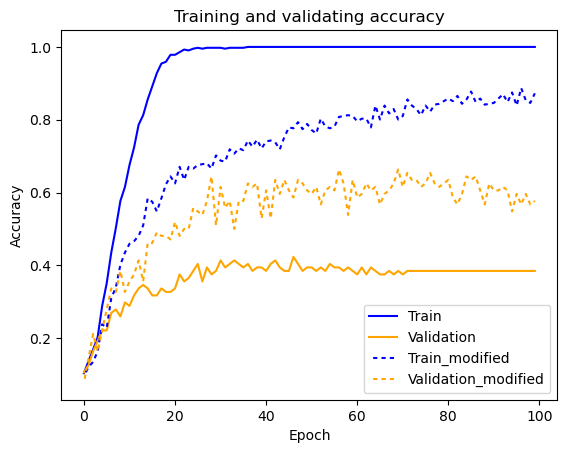

In [7]:
plt.plot(hisotry_cnn.history['accuracy'], label='Train', color='blue')
plt.plot(hisotry_cnn.history['val_accuracy'], label='Validation', color='orange')
plt.plot(hisotry_cnn_new.history['accuracy'], label='Train_modified',linestyle=(2, (2, 2)), color='blue')
plt.plot(hisotry_cnn_new.history['val_accuracy'], label='Validation_modified', linestyle=(2, (2, 2)), color='orange')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy')
plt.legend()
plt.show()

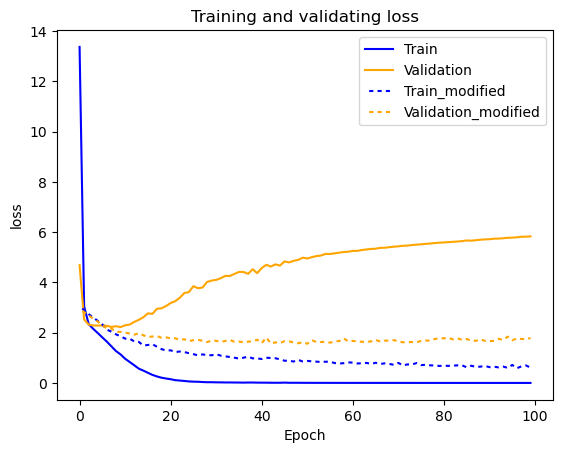

In [8]:
plt.plot(hisotry_cnn.history['loss'], label='Train', color='blue')
plt.plot(hisotry_cnn.history['val_loss'], label='Validation', color='orange')
plt.plot(hisotry_cnn_new.history['loss'], label='Train_modified',linestyle=(2, (2, 2)), color='blue')
plt.plot(hisotry_cnn_new.history['val_loss'], label='Validation_modified', linestyle=(2, (2, 2)), color='orange')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss')
plt.legend()
plt.show()

In [9]:
cnn_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 24)        3480      
                                                      

### 2. Error anaylsis
Evaluate your CNN model from question 1.2 on the test dataset. See assignment spec for details.

In [10]:
# create the test dataset without shuffling
test_data = tf.keras.utils.image_dataset_from_directory(
    data_dir+'/test',
    seed=rand_seed,
    image_size=(32, 32),
    batch_size=1,
    shuffle = False)

# evaluate the modified cnn model for the test set using confusion_matrix
from sklearn.metrics import confusion_matrix
test_pred = cnn_new.predict(test_data)
test_pred_class = np.argmax(test_pred, axis=1) # the prediction class results 
true_test_class = tf.concat([y for x, y in test_data], axis=0).numpy() # true test set class result
accuracy_class = confusion_matrix(true_test_class, test_pred_class)
accuracy_class = accuracy_class.astype('float') / accuracy_class.sum(axis=1)[:, np.newaxis]
accuracy_class = accuracy_class.diagonal()

print('Overall accuracy:', round(sum(accuracy_class) / len(accuracy_class),4))
print()
for i in range(len(accuracy_class)):
    print(f'{class_names[i]} accuracy: {round(accuracy_class[i],4)}')

Found 70 files belonging to 10 classes.
70/70 [==============================] - 1s 6ms/step
Overall accuracy: 0.6286

bridge accuracy: 0.8571
childs accuracy: 0.7143
downwarddog accuracy: 0.7143
mountain accuracy: 1.0
plank accuracy: 0.4286
seatedforwardbend accuracy: 0.2857
tree accuracy: 0.4286
trianglepose accuracy: 1.0
warrior1 accuracy: 0.2857
warrior2 accuracy: 0.5714


### 3. Visualisation
Visualise the feature space that your model uses to classify images. See assignment spec for details.

In [11]:
# collect training set data for not being shuffled
train_images = []
train_labels = []
for images, labels in train_data:
    train_images.append(images)
    
    for label in labels:
        train_labels.append(label.numpy())

train_images = tf.concat(train_images, 0)
# find model layer name
layer = []
for idx in range(len(cnn_new.layers)):
    layer.append(cnn_new.get_layer(index = idx).name)

# set up the model that output is using the last layer
model = Model(inputs=cnn_new.input, outputs=cnn_new.get_layer(layer[-1]).output)

# create the test and train feature set
test_features = model.predict(test_data)
train_features = model.predict(train_images)


13/13 [==============================] - 0s 9ms/step


In [12]:
# create knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit(train_features, train_labels)

KNeighborsClassifier(metric='euclidean')

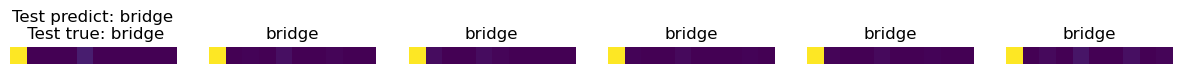

Train distances [0.03957215 0.05643118 0.05962922 0.06340087 0.06498859]


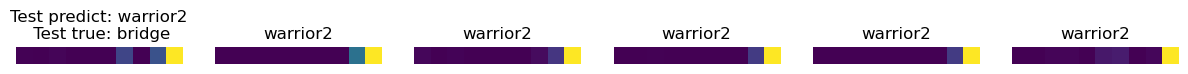

Train distances [0.17994316 0.20665687 0.21750539 0.22570313 0.24475504]


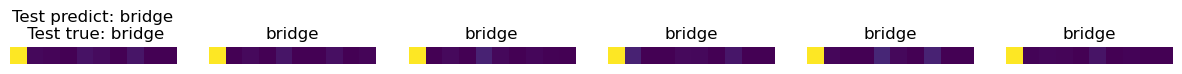

Train distances [0.0461794  0.05775066 0.07042946 0.07321718 0.08045732]


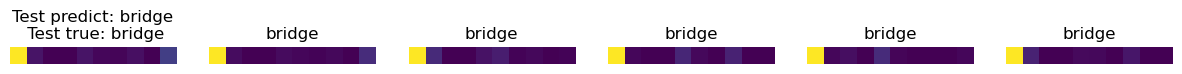

Train distances [0.09015539 0.15521865 0.17195116 0.17719878 0.17994328]


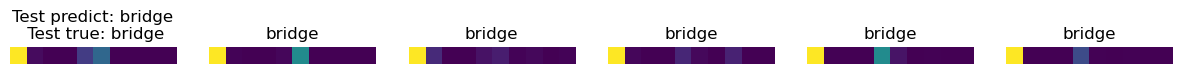

Train distances [0.14571961 0.2245024  0.26424852 0.26988994 0.27290884]


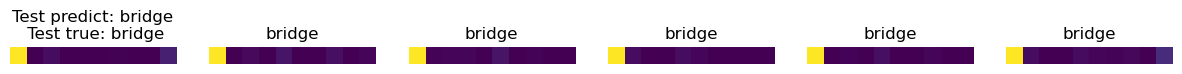

Train distances [0.08842266 0.09321076 0.09660281 0.09739892 0.09772969]


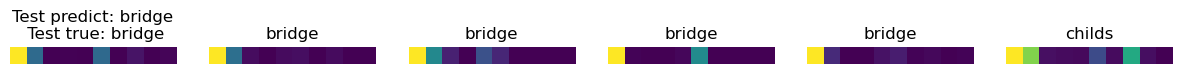

Train distances [0.20424456 0.20677276 0.24571701 0.26852855 0.32091376]


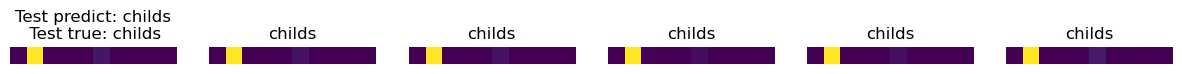

Train distances [0.00737463 0.00766562 0.02095073 0.02318194 0.02403287]


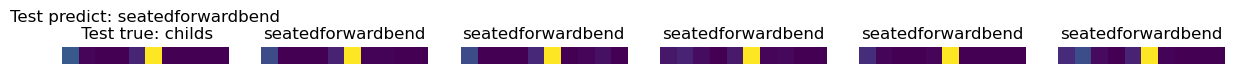

Train distances [0.0393292  0.04960721 0.17241947 0.18374128 0.19512712]


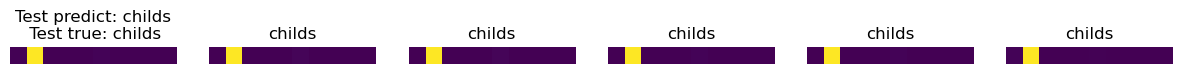

Train distances [0.0023738  0.0044902  0.00615087 0.00634001 0.00774573]


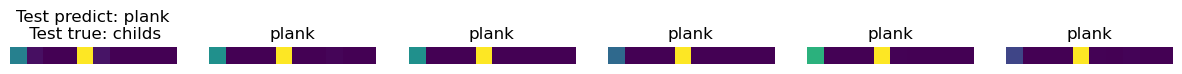

Train distances [0.06176867 0.06650514 0.10590035 0.11771776 0.2053652 ]


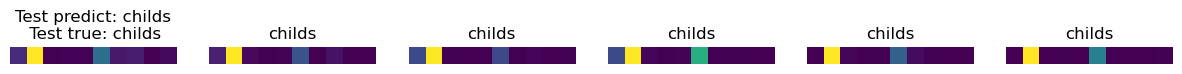

Train distances [0.11911847 0.14111493 0.15537156 0.15656568 0.15806593]


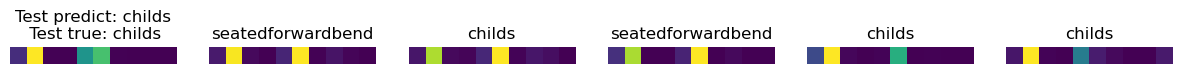

Train distances [0.21570427 0.22762487 0.24005277 0.24797304 0.31551277]


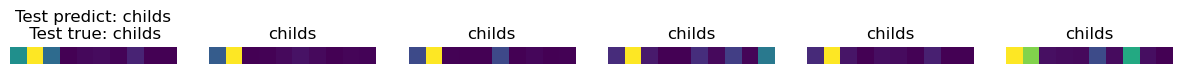

Train distances [0.26459848 0.30066834 0.31575934 0.32323117 0.33477121]


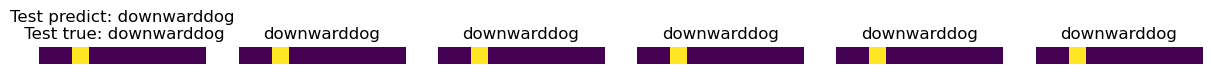

Train distances [0.00051075 0.00150422 0.0015306  0.00160895 0.00163398]


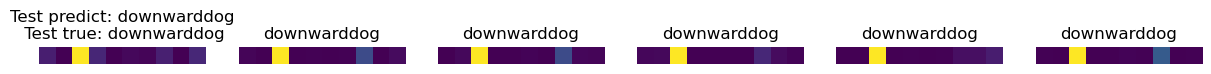

Train distances [0.17733034 0.17921112 0.18469361 0.18724552 0.20399699]


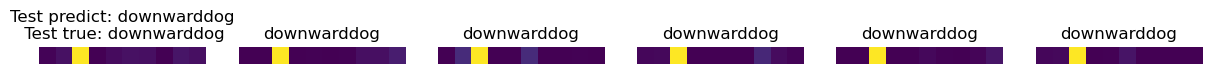

Train distances [0.10347587 0.11259636 0.12246086 0.14114544 0.14177424]


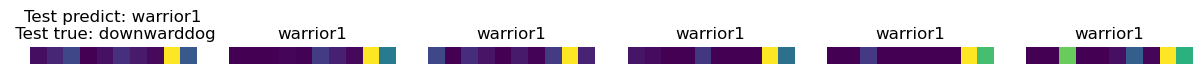

Train distances [0.17239292 0.19138561 0.21031495 0.25622001 0.26605406]


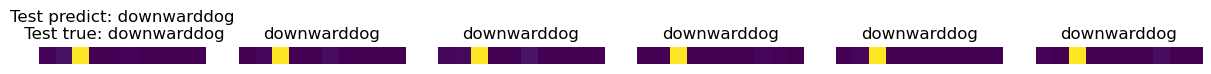

Train distances [0.03769471 0.04932632 0.05583124 0.05815456 0.05932814]


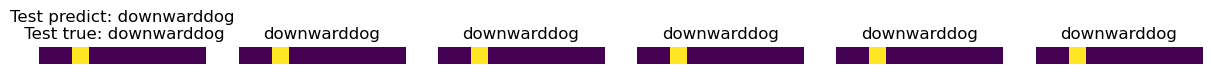

Train distances [0.0019381  0.00199695 0.00206959 0.00208772 0.00238865]


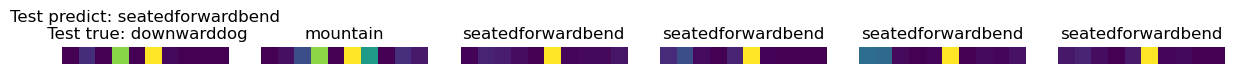

Train distances [0.29191448 0.46693262 0.46773    0.47856627 0.49705605]


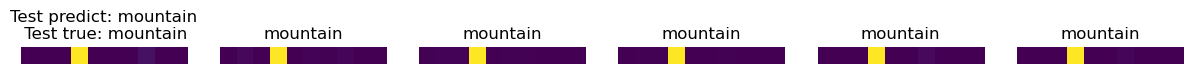

Train distances [0.03991274 0.04413104 0.04878043 0.04937084 0.0502679 ]


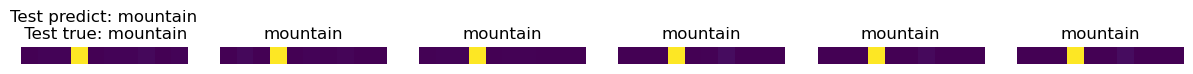

Train distances [0.02055357 0.03307456 0.03606319 0.04545654 0.04604778]


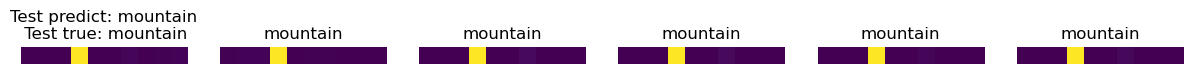

Train distances [0.01825581 0.01999843 0.02086085 0.02239631 0.02267428]


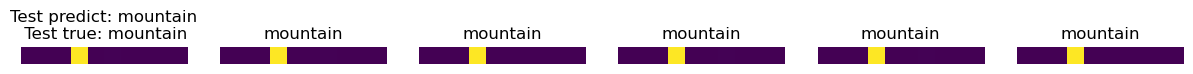

Train distances [0.00519515 0.00625767 0.0070892  0.00715314 0.00733268]


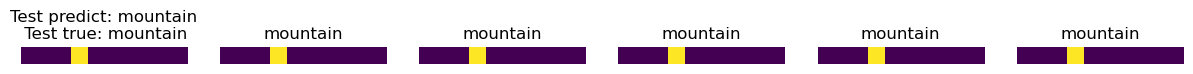

Train distances [0.00051015 0.00052369 0.00054328 0.00062782 0.00149117]


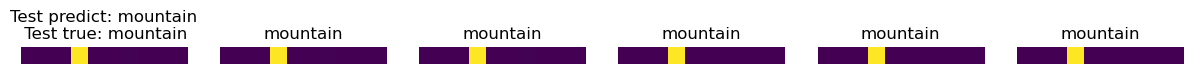

Train distances [0.00067097 0.00167086 0.00186308 0.00215894 0.00249769]


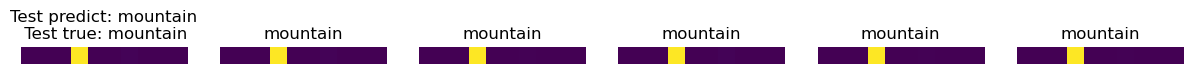

Train distances [0.00140265 0.00208509 0.00351265 0.00429825 0.00441743]


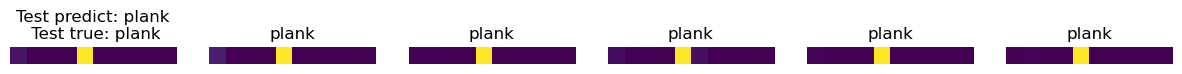

Train distances [0.03913964 0.05077774 0.05388836 0.05436861 0.05560724]


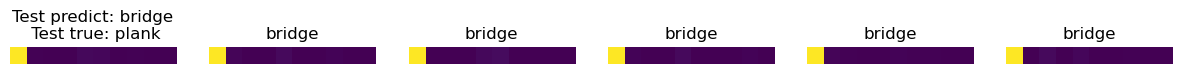

Train distances [0.01654836 0.01675182 0.01806768 0.02417477 0.02908225]


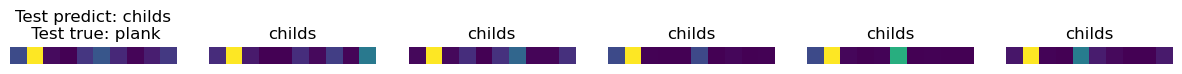

Train distances [0.19931163 0.20570811 0.23980894 0.24292316 0.24845215]


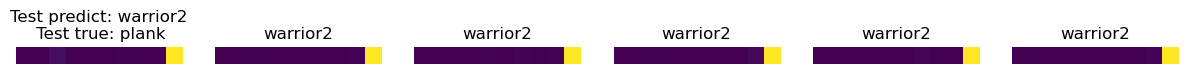

Train distances [0.03573692 0.03636178 0.03830407 0.03847816 0.03889157]


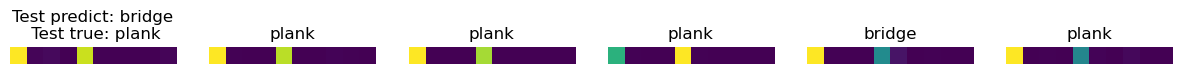

Train distances [0.02263711 0.03554044 0.18524718 0.21193599 0.22795574]


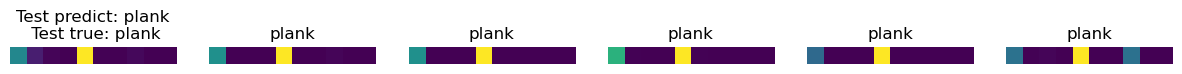

Train distances [0.07037388 0.07764537 0.1097469  0.1323827  0.22693121]


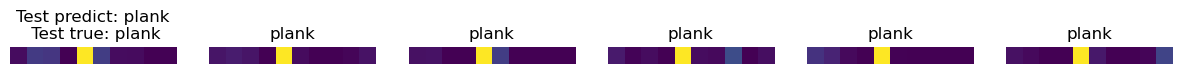

Train distances [0.20322835 0.20729086 0.22286079 0.23143624 0.24277798]


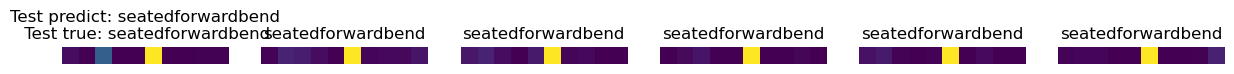

Train distances [0.18761465 0.2213761  0.2465494  0.25514895 0.26202917]


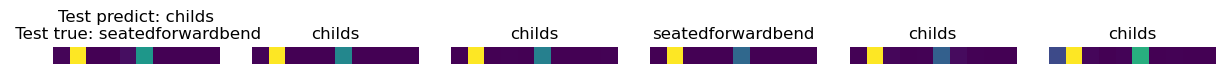

Train distances [0.05606094 0.0729859  0.14497237 0.15140404 0.15214664]


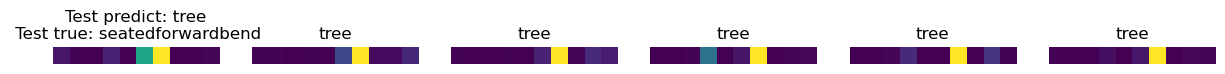

Train distances [0.23843365 0.33783032 0.36693838 0.40897542 0.41645655]


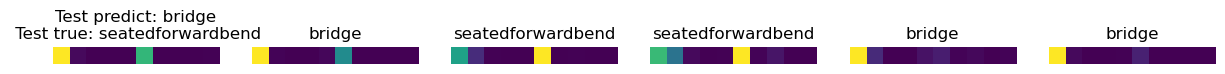

Train distances [0.10175428 0.32435742 0.32747225 0.38536062 0.43055336]


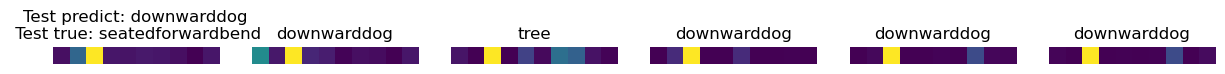

Train distances [0.27280643 0.27694193 0.28396345 0.32564759 0.34153419]


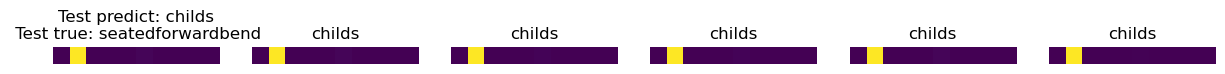

Train distances [0.00218734 0.00238263 0.00357339 0.00428405 0.01063198]


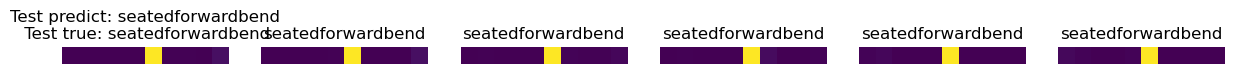

Train distances [0.01119364 0.02350582 0.03850037 0.04287124 0.04509215]


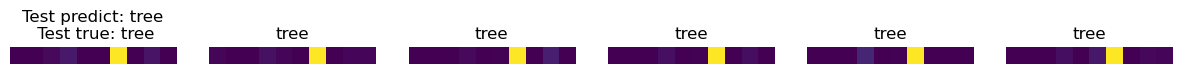

Train distances [0.05526338 0.05585174 0.05804394 0.06339538 0.07149175]


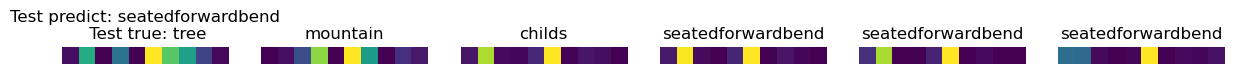

Train distances [0.30738558 0.38353648 0.39726887 0.41908154 0.42849114]


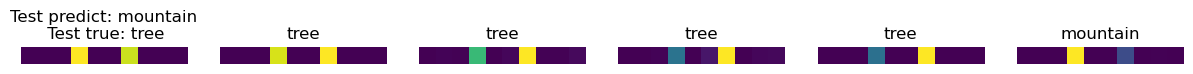

Train distances [0.05051519 0.16362354 0.32928158 0.3537391  0.40819177]


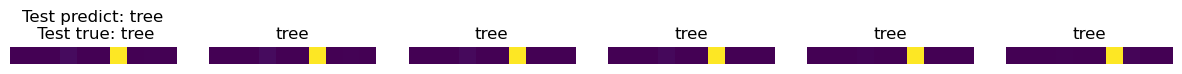

Train distances [0.00435022 0.01264543 0.01778693 0.02681555 0.0276099 ]


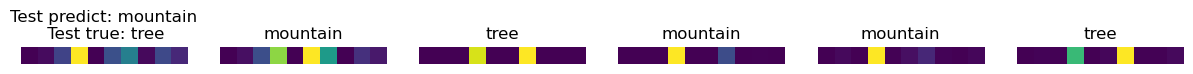

Train distances [0.28911516 0.37397341 0.40802107 0.4173957  0.42132252]


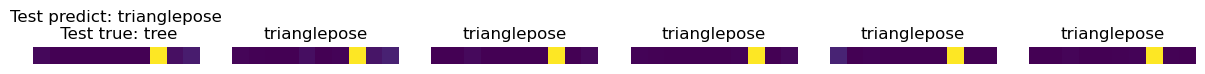

Train distances [0.06195566 0.09493784 0.09721245 0.10304132 0.1119127 ]


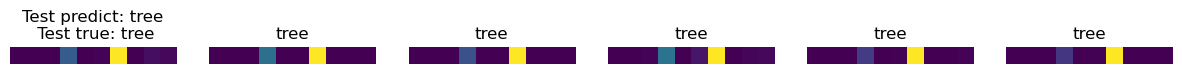

Train distances [0.06178067 0.07301694 0.08701107 0.12264466 0.14655222]


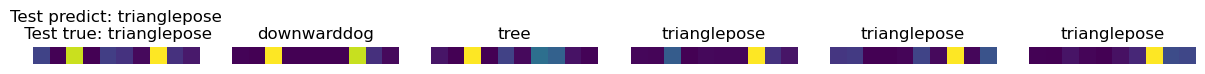

Train distances [0.19178393 0.29972179 0.32151187 0.40995514 0.41132802]


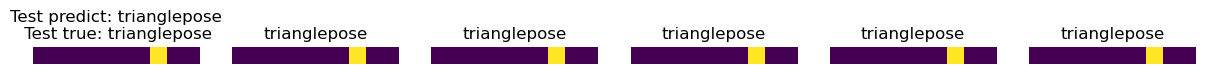

Train distances [0.00103907 0.00207827 0.00273907 0.00289578 0.00290311]


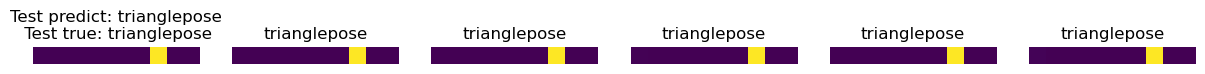

Train distances [0.00349268 0.00452797 0.00457246 0.00605625 0.00626616]


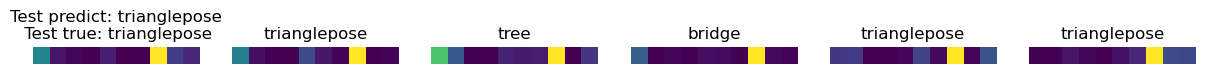

Train distances [0.14945882 0.18897395 0.20220308 0.23040971 0.26402225]


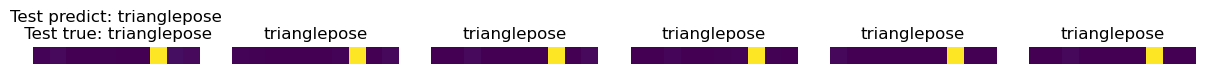

Train distances [0.06352242 0.06357052 0.07065518 0.08015652 0.08592195]


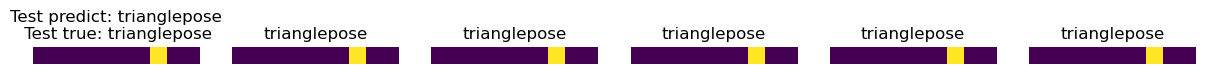

Train distances [7.42316154e-05 1.57996715e-04 1.82654022e-04 2.02730455e-04
 2.04509491e-04]


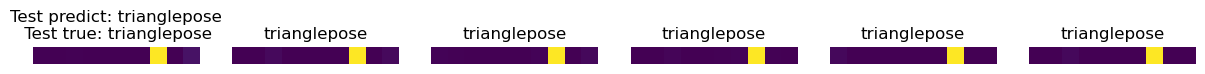

Train distances [0.02764365 0.02805876 0.04641454 0.05155798 0.05508185]


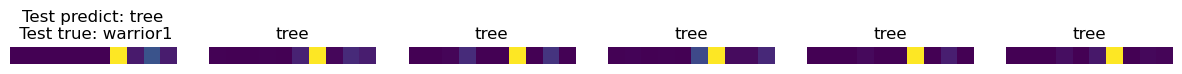

Train distances [0.12953378 0.15135354 0.22593904 0.22963433 0.2527026 ]


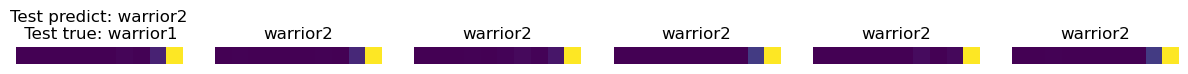

Train distances [0.02354471 0.03546693 0.07694214 0.07954637 0.08186236]


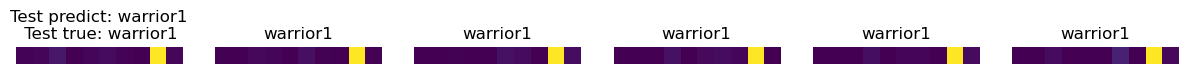

Train distances [0.07292763 0.07393569 0.08442301 0.08740035 0.08823687]


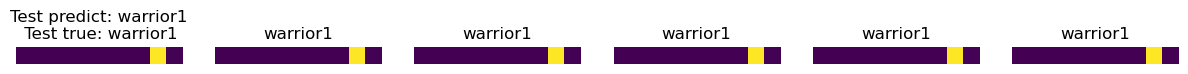

Train distances [0.00201667 0.00204135 0.00217635 0.00352157 0.00452775]


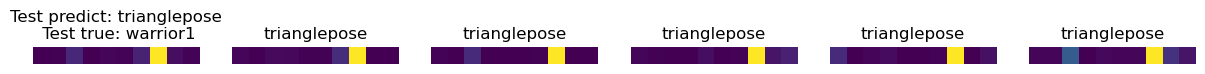

Train distances [0.10692515 0.14273611 0.14752115 0.15492523 0.18731388]


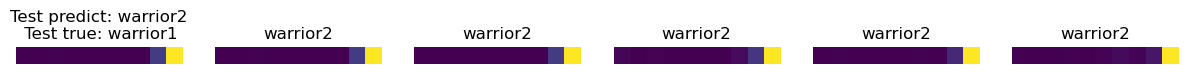

Train distances [3.61020725e-07 1.11662233e-02 3.80590597e-02 6.10079871e-02
 1.11852925e-01]


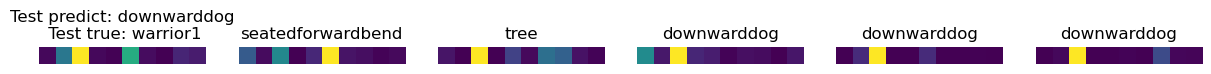

Train distances [0.37382638 0.37903716 0.39880819 0.41057561 0.48667536]


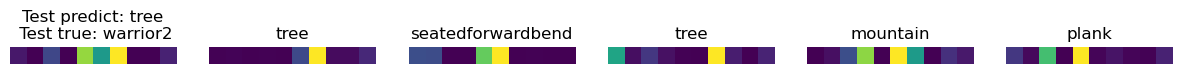

Train distances [0.46226802 0.46726051 0.46970834 0.4822246  0.50408007]


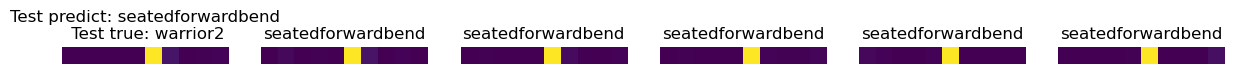

Train distances [0.02848818 0.03722501 0.05024281 0.06411572 0.06522118]


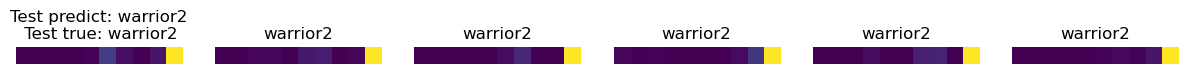

Train distances [0.11974608 0.17074356 0.17731492 0.1799533  0.18543978]


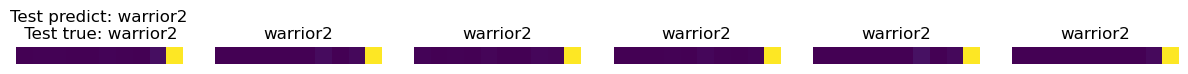

Train distances [0.02836595 0.03070861 0.03437334 0.04030133 0.04074914]


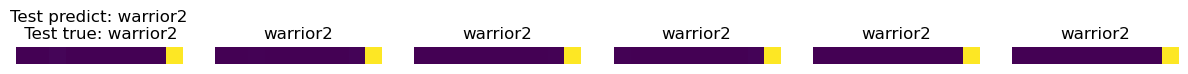

Train distances [0.01334492 0.01352517 0.01585013 0.01851262 0.0186385 ]


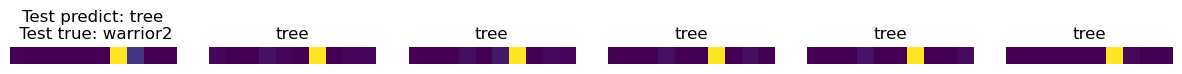

Train distances [0.14057555 0.14600147 0.14765418 0.14790671 0.1483938 ]


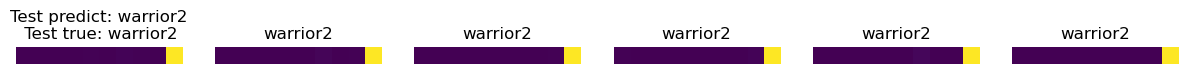

Train distances [0.01126297 0.0122131  0.01222185 0.01407498 0.01485287]


In [13]:
# visualize the test images with 5 nearest neigbors in train set
for idx in range(len(test_features)):
    test_image = [test_features[idx]]
    pred_class = test_pred_class[idx]

    neigh_idx = []
    dist_idx = []
    kneighbors = knn.kneighbors([test_features[idx]])
    for test_neigh in kneighbors[1]:
        for neigh in test_neigh:
            neigh_idx.append(neigh)

    fig, axs = plt.subplots(1, 6, figsize=(15, 15))
    axs[0].imshow(test_image)
    axs[0].axis('off')
    axs[0].title.set_text('Test predict: ' + class_names[pred_class]+'\n Test true: '+class_names[true_test_class[idx]])
    axs[1].imshow([train_features[neigh_idx[0]]])
    axs[1].axis('off')
    axs[1].title.set_text(class_names[train_labels[neigh_idx[0]]])
    axs[2].imshow([train_features[neigh_idx[1]]])
    axs[2].axis('off')
    axs[2].title.set_text(class_names[train_labels[neigh_idx[1]]])
    axs[3].imshow([train_features[neigh_idx[2]]])
    axs[3].axis('off')
    axs[3].title.set_text(class_names[train_labels[neigh_idx[2]]])
    axs[4].imshow([train_features[neigh_idx[3]]])
    axs[4].axis('off')
    axs[4].title.set_text(class_names[train_labels[neigh_idx[3]]])
    axs[5].imshow([train_features[neigh_idx[4]]])
    axs[5].axis('off')
    axs[5].title.set_text(class_names[train_labels[neigh_idx[4]]])
    plt.show()
    print('Train distances', kneighbors[0][0])